*Portfolio Project: Tree Species Classification using LiDAR and Machine Learning*

Import Library

In [5]:
#Import Library
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,root_mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import numpy as np

Load Dataset

In [2]:
# Load the dataset
csv=pd.read_csv(r"H:\AfifBelajar\Kaggle LiDAR Inventory\metric.csv",sep=";")
csv

plot  tree_no species    d1    d2    dbh  age  height  angle   comment  \
0        1        1   Birch  47.2  46.2  46.70    0    26.5      0         0   
1        1        2   Aspen  27.9  29.1  28.50    0     0.0      0         0   
2        1        3     Fir  12.1  13.0  12.55    0     0.0      0         0   
3        1        4   Aspen  23.3  23.7  23.50   69    27.4      0         0   
4        1        5   Aspen  23.2  31.3  27.25    0     0.0      0         0   
...    ...      ...     ...   ...   ...    ...  ...     ...    ...       ...   
3597    10      522     Fir  10.0   9.3   9.65    0     0.0      0         0   
3598    10      523   Tilia  19.6  21.0  20.30    0     0.0      0  Two tops   
3599    10      524     Fir  22.8  24.7  23.75    0     0.0      0         0   
3600    10      525   Birch  23.3  23.1  23.20    0     0.0      0         0   
3601    10      526     Fir  17.0  18.7  17.85    0     0.0      0         0   

      ...        isd     iskew     ikurt  ipground  ipcumzq10  ipcumzq30  \
0     ...  11.937056  0.311502  2.069355  3.030907   9.721866  29.418017   
1     ...  12.064370  0.275861  2.004636  2.717875   9.985794  29.716061   
2     ...  11.883507  0.291994  2.012883  2.601772   9.793492  29.613579   
3     ...  11.873406  0.301512  2.012833  3.077241   9.787535  29.513685   
4     ...  11.948427  0.249664  1.948659  3.721969   9.767252  29.480024   
...   ...        ...       ...       ...       ...        ...        ...   
3597  ...  12.976960  0.019818  1.618033  0.114615  10.058653  30.127529   
3598  ...  12.852015  0.063554  1.707414  0.154719   9.776321  29.911842   
3599  ...  12.066660  0.429194  2.201926  0.134756   9.493969  29.342884   
3600  ...  12.266913  0.281920  1.952830  0.225559   9.665058  29.710373   
3601  ...  12.304053  0.262280  1.938395  0.179415   9.742557  29.747296   

      ipcumzq50  ipcumzq70  ipcumzq90                               geometry  
0     49.671193  69.920574  89.957393  c(547075.839999999, 6450425.24299999)  
1     49.946943  69.944205  89.899534             c(547074.299, 6450419.542)  
2     49.698009  69.930630  89.793973        c(547077.454, 6450419.99399999)  
3     49.713745  69.931299  89.727422        c(547078.211, 6450419.01999999)  
4     49.660125  69.646130  89.667122  c(547074.668999999, 6450415.57299999)  
...         ...        ...        ...                                    ...  
3597  49.791218  69.869780  89.906371  c(546598.562999999, 6449083.92499999)  
3598  50.123775  70.102683  90.065171  c(546594.680999999, 6449079.40199999)  
3599  49.249550  69.579735  89.790432  c(546576.236999999, 6449102.08999999)  
3600  49.634038  69.598759  89.736325        c(546600.707, 6449170.21999999)  
3601  49.765012  69.854945  89.772234       c(546602.317999999, 6449170.102)  

[3602 rows x 132 columns]

In [10]:
#Check Column name and data types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602 entries, 0 to 3601
Data columns (total 121 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    class                     int64  
 1    n                         int64  
 2    zmax                      float64
 3    zmin                      float64
 4    zmean                     float64
 5    zvar                      float64
 6    zsd                       float64
 7    zcv                       float64
 8    zskew                     float64
 9    zkurt                     float64
 10   zq1                       float64
 11   zq5                       float64
 12   zq10                      float64
 13   zq15                      float64
 14   zq20                      float64
 15   zq25                      float64
 16   zq30                      float64
 17   zq35                      float64
 18   zq40                      float64
 19   zq45                      float64
 20   zq50  

In [3]:
#Create "class" column
csv['class'] = 0

#Assign "Fir" and "Spruce" as class coniferous (1) and the others as deciduous (2)
csv.loc[csv["species"]=='Spruce','class']=1
csv.loc[csv["species"]=='Fir','class']=1

#Remove irrelevant columns
df=csv.iloc[0:len(csv),10:132]
df=df.drop(columns=['geometry'])
df

class     n     zmax  zmin      zmean       zvar       zsd        zcv  \
0         0  2317  26.8797   0.0  20.034415  47.488348  6.891179  34.396707   
1         0  2555  26.9013   0.0  20.039867  67.819684  8.235271  41.094439   
2         1  2712  26.9013   0.0  19.882270  60.929942  7.805763  39.259921   
3         0  2733  26.9013   0.0  19.951544  64.237503  8.014830  40.171478   
4         0  2585  26.9013   0.0  21.320798  58.970661  7.679236  36.017581   
...     ...   ...      ...   ...        ...        ...       ...        ...   
3597      1  3893  20.2776   0.0  15.343097   4.000317  2.000079  13.035695   
3598      0  3360  19.4199   0.0  13.439448   4.619106  2.149211  15.991807   
3599      1  3435  21.0298   0.0  14.990616   6.941768  2.634724  17.575819   
3600      0  4326  22.6954   0.0  13.653954  15.378855  3.921588  28.721266   
3601      1  3879  22.6954   0.0  14.025423  11.970269  3.459808  24.668117   

         zskew     zkurt  ...      imean        isd     iskew     ikurt  \
0    -1.703618  4.767734  ...  45.481657  11.937056  0.311502  2.069355   
1    -1.390231  3.287553  ...  45.736204  12.064370  0.275861  2.004636   
2    -1.471627  3.690651  ...  46.031711  11.883507  0.291994  2.012883   
3    -1.490740  3.680007  ...  46.016100  11.873406  0.301512  2.012833   
4    -1.934849  5.208678  ...  46.438685  11.948427  0.249664  1.948659   
...        ...       ...  ...        ...        ...       ...       ...   
3597 -1.057214  6.778481  ...  47.736964  12.976960  0.019818  1.618033   
3598 -0.579865  5.631822  ...  47.128571  12.852015  0.063554  1.707414   
3599 -0.418380  4.005510  ...  43.855313  12.066660  0.429194  2.201926   
3600  0.244973  2.578982  ...  45.605178  12.266913  0.281920  1.952830   
3601  0.239981  3.107278  ...  45.692962  12.304053  0.262280  1.938395   

      ipground  ipcumzq10  ipcumzq30  ipcumzq50  ipcumzq70  ipcumzq90  
0     3.030907   9.721866  29.418017  49.671193  69.920574  89.957393  
1     2.717875   9.985794  29.716061  49.946943  69.944205  89.899534  
2     2.601772   9.793492  29.613579  49.698009  69.930630  89.793973  
3     3.077241   9.787535  29.513685  49.713745  69.931299  89.727422  
4     3.721969   9.767252  29.480024  49.660125  69.646130  89.667122  
...        ...        ...        ...        ...        ...        ...  
3597  0.114615  10.058653  30.127529  49.791218  69.869780  89.906371  
3598  0.154719   9.776321  29.911842  50.123775  70.102683  90.065171  
3599  0.134756   9.493969  29.342884  49.249550  69.579735  89.790432  
3600  0.225559   9.665058  29.710373  49.634038  69.598759  89.736325  
3601  0.179415   9.742557  29.747296  49.765012  69.854945  89.772234  

[3602 rows x 121 columns]

In [15]:
# Check which columns have NaN values
col_nan = df.columns[df.isna().any()].tolist()
print(f'Columns with at least one NaN value: {col_nan}')

Columns with at least one NaN value: []


Text(0.5, 1.0, 'Distribution of Class Columns: ')

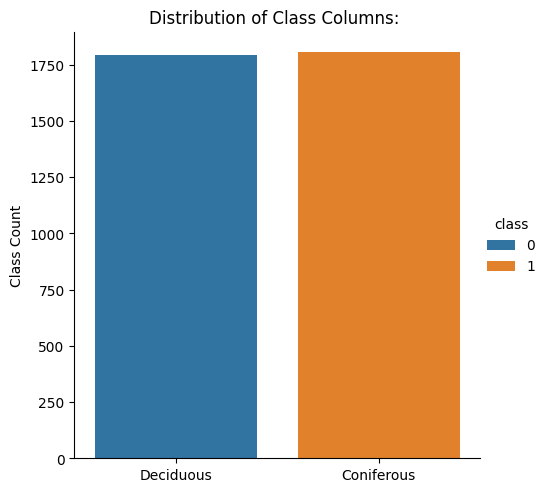

In [39]:
#Data balance checking
g=sns.catplot(data=df, x="class", hue="class", kind="count")
g.set_axis_labels("", "Class Count")
g.set_xticklabels(["Deciduous", "Coniferous"])
plt.title("Distribution of Class Columns: ")

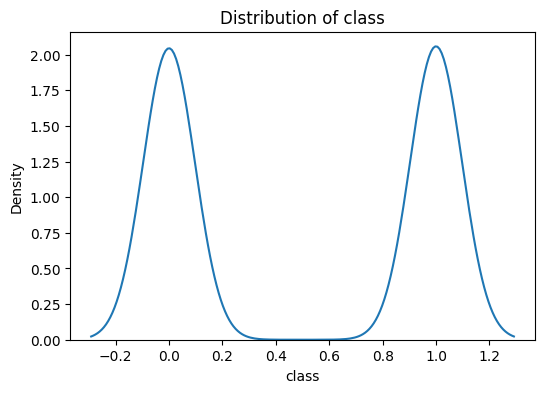

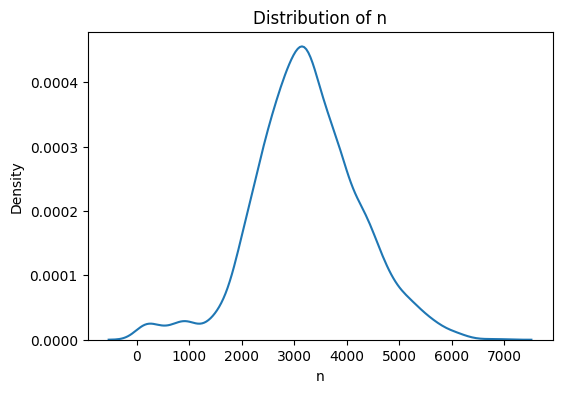

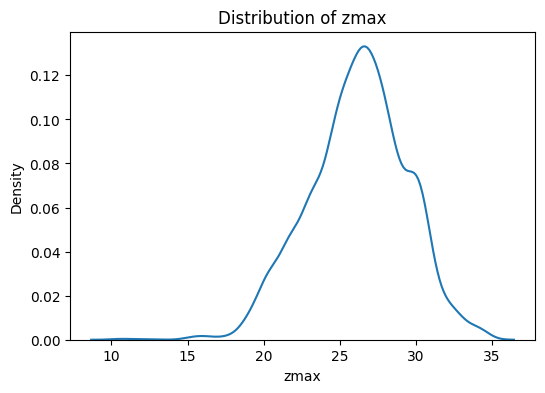

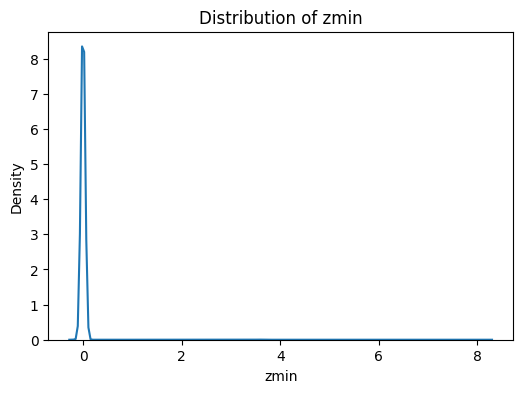

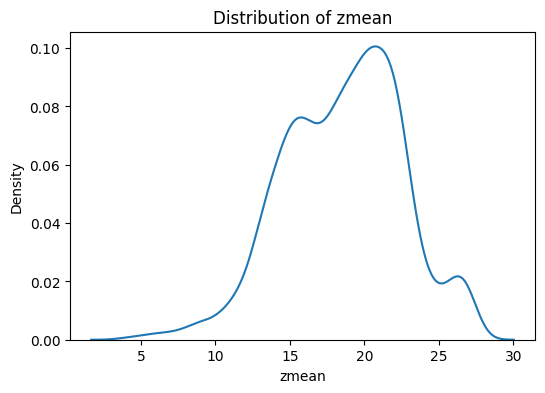

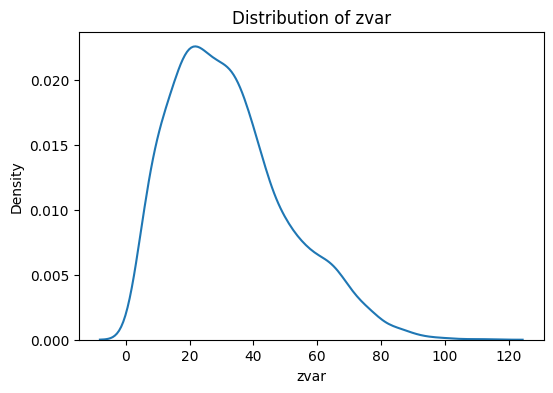

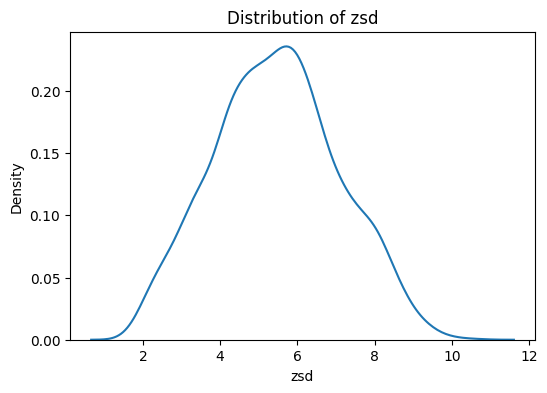

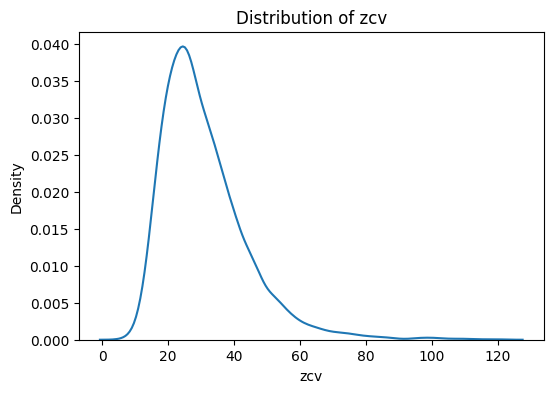

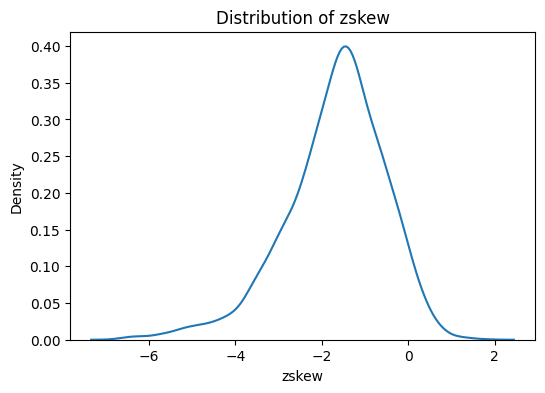

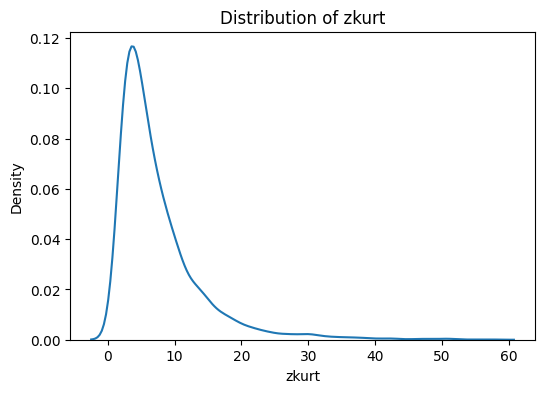

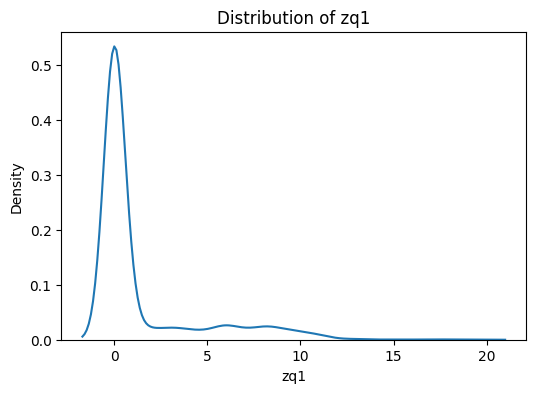

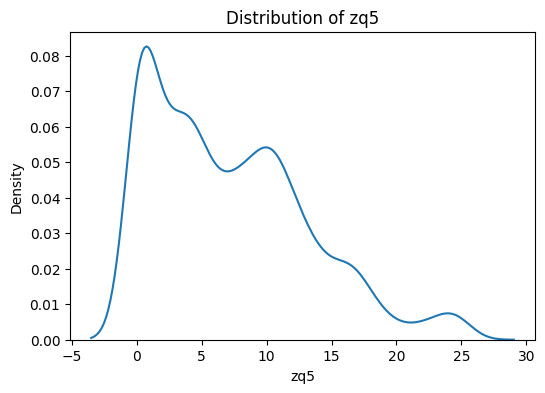

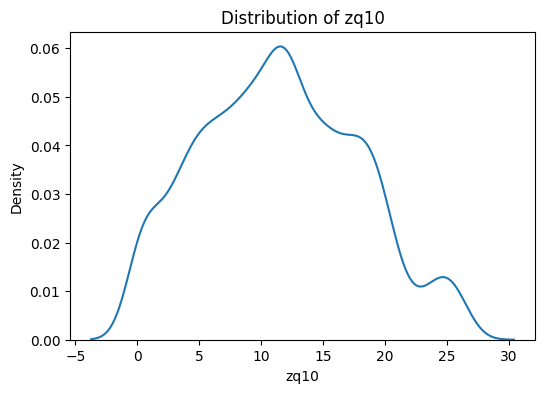

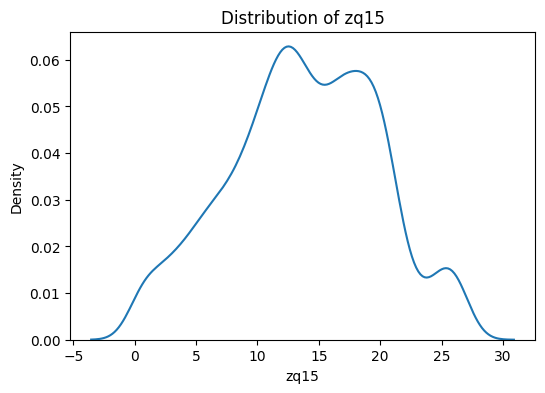

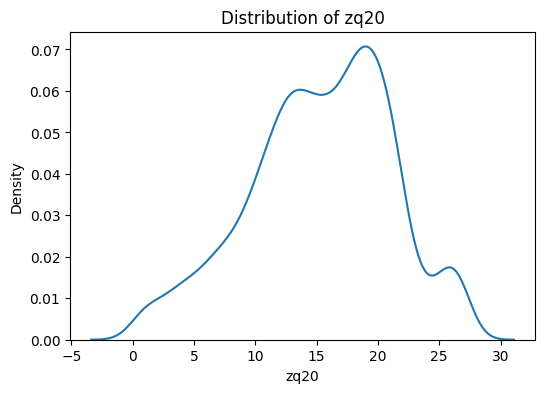

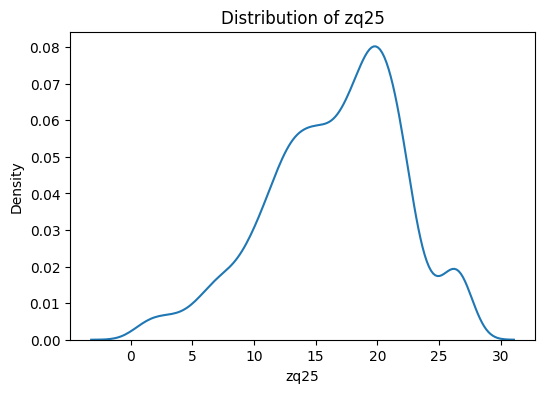

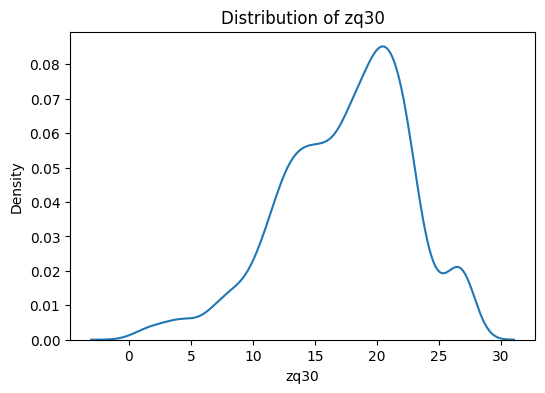

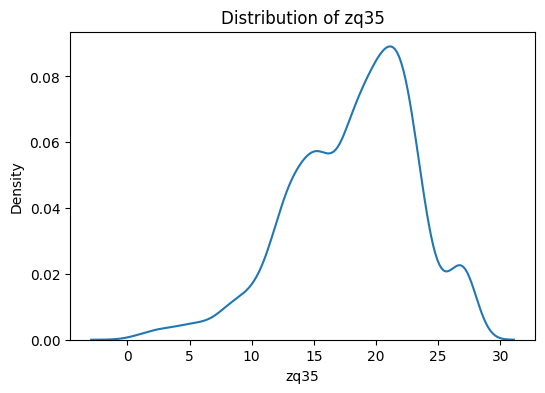

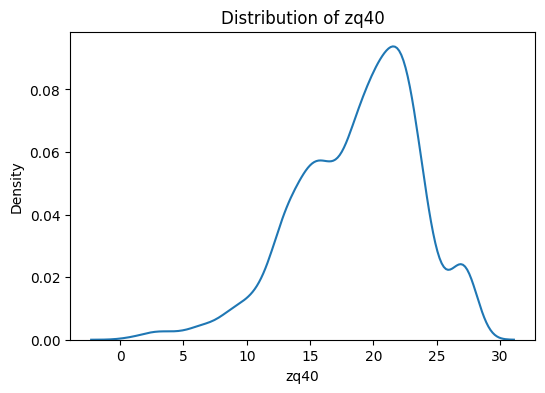

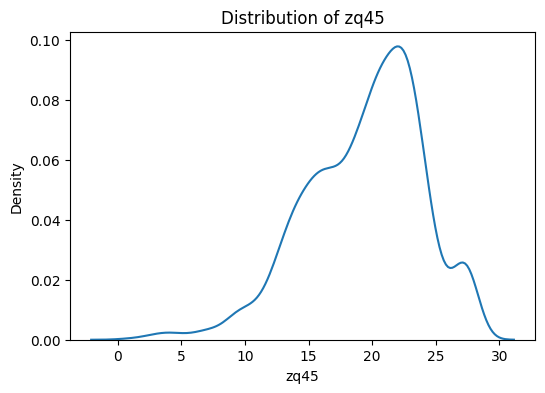

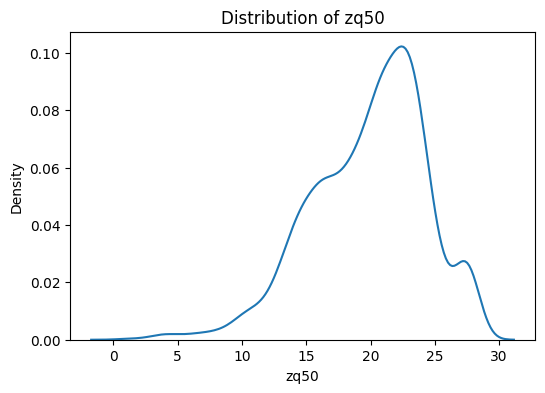

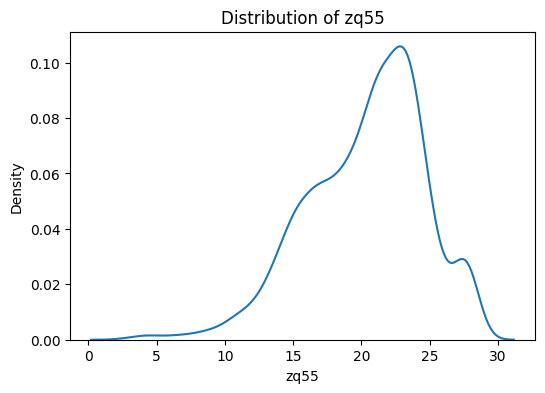

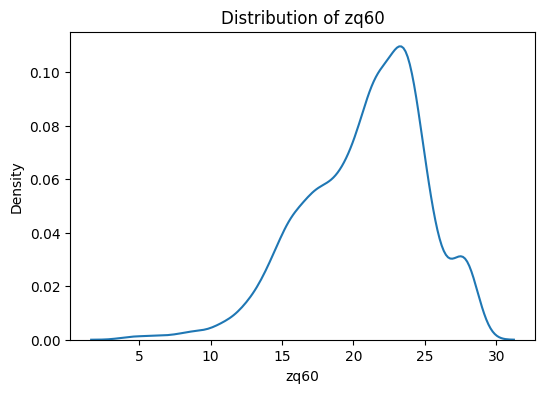

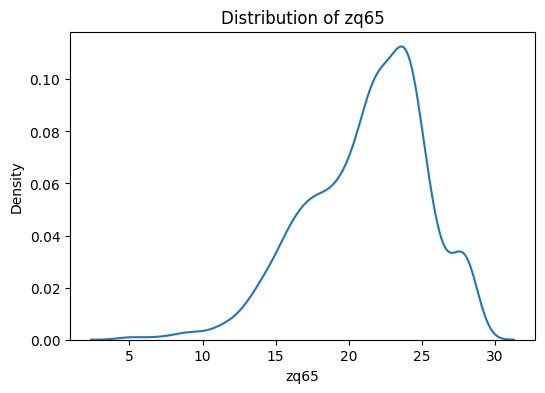

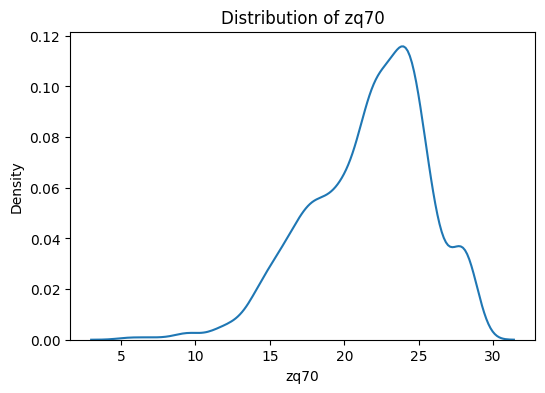

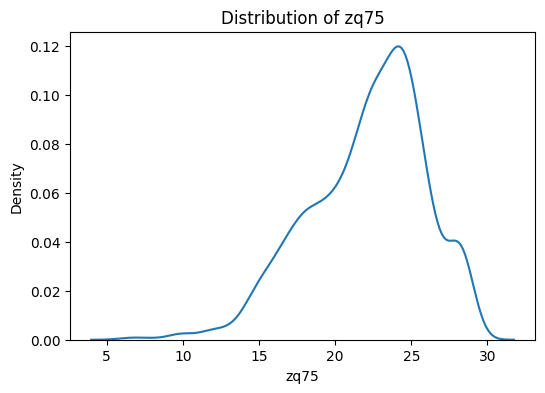

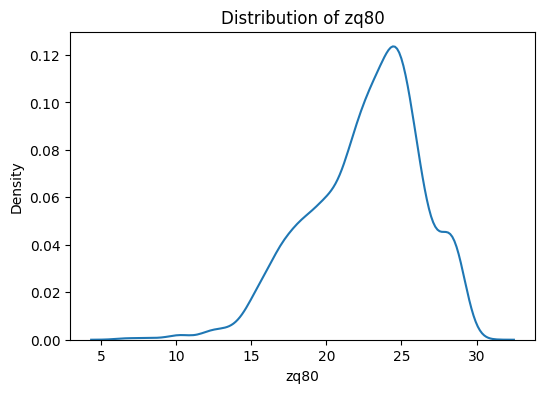

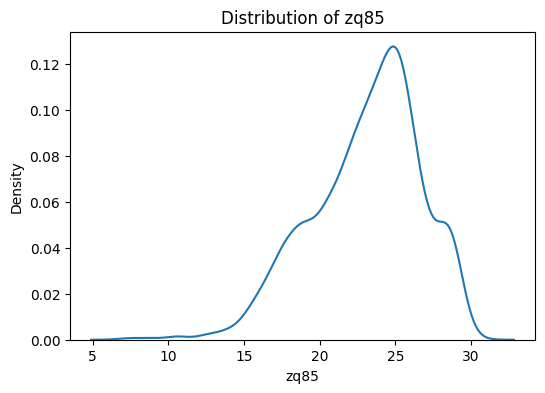

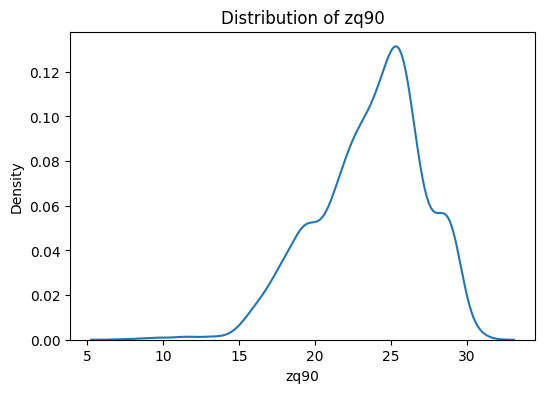

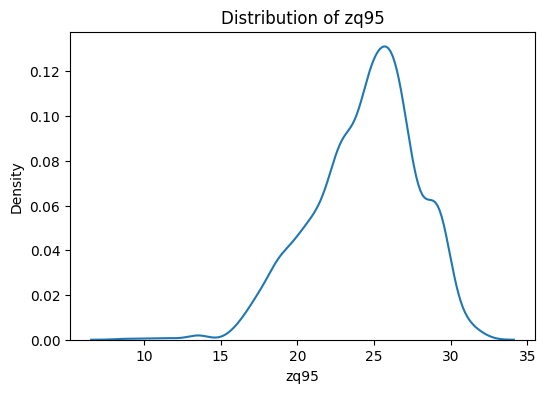

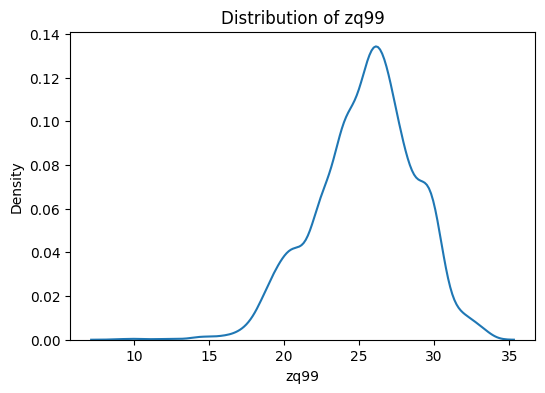

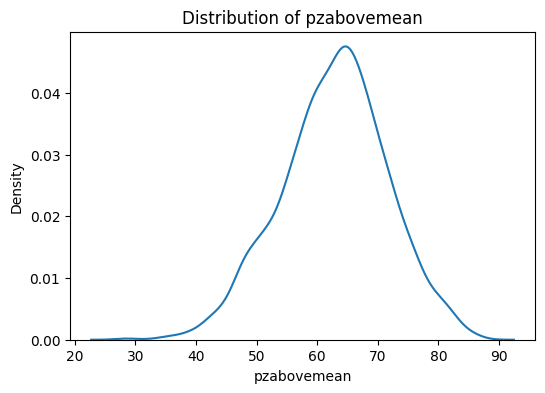

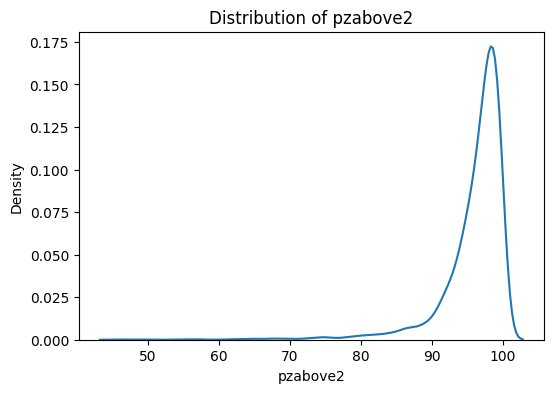

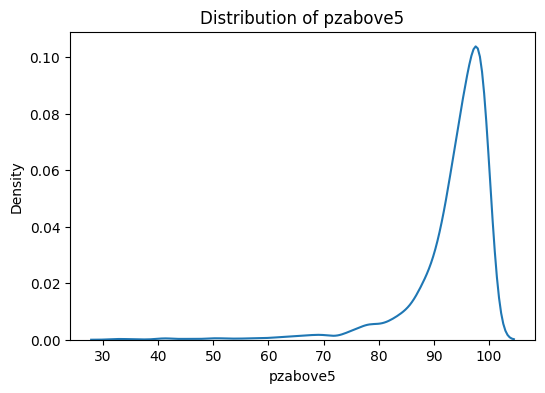

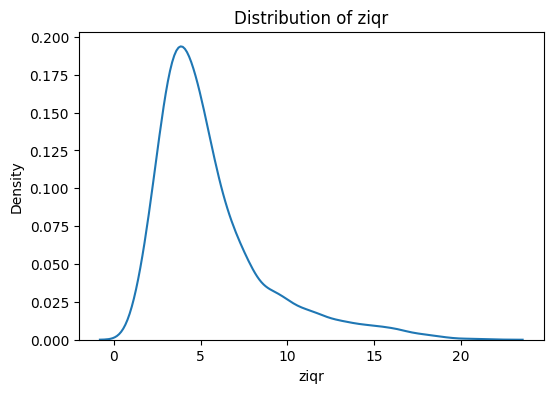

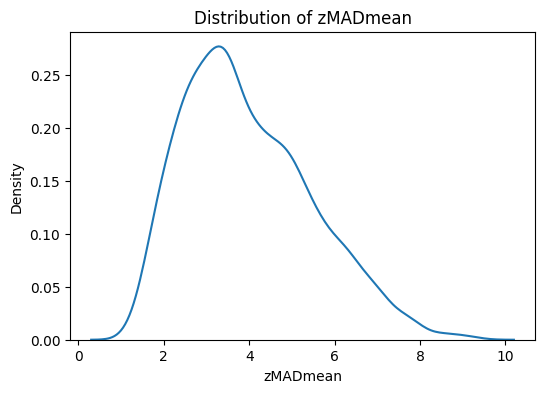

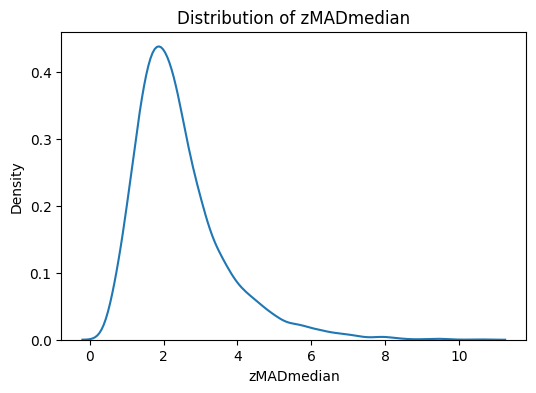

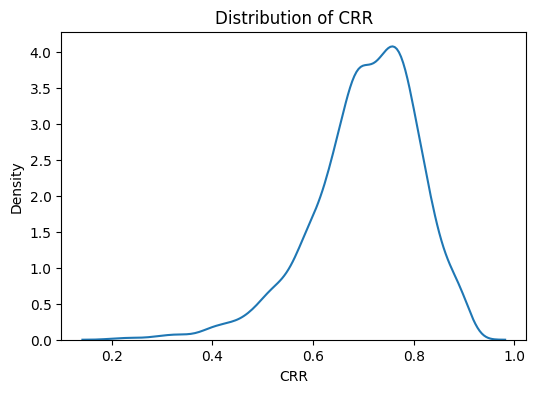

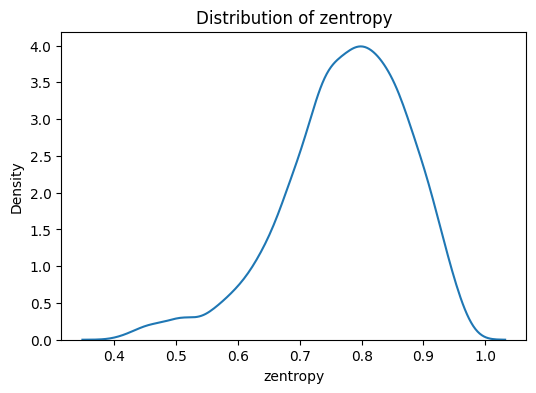

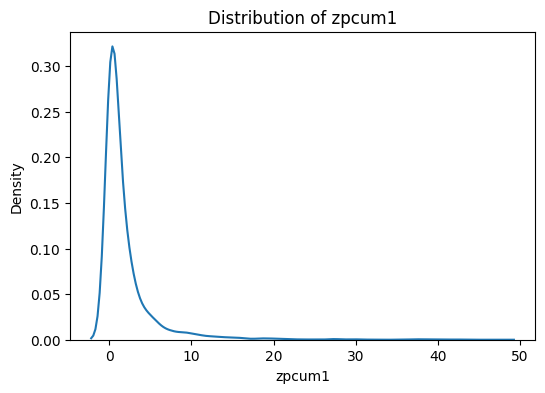

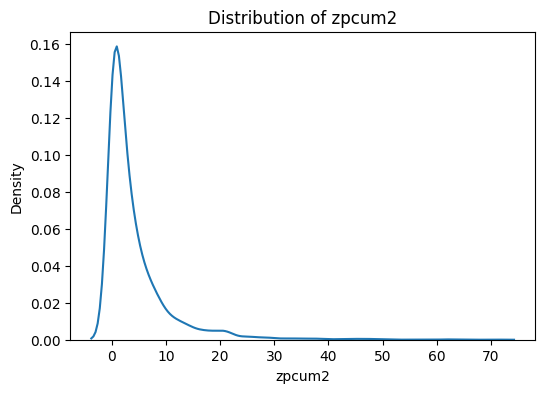

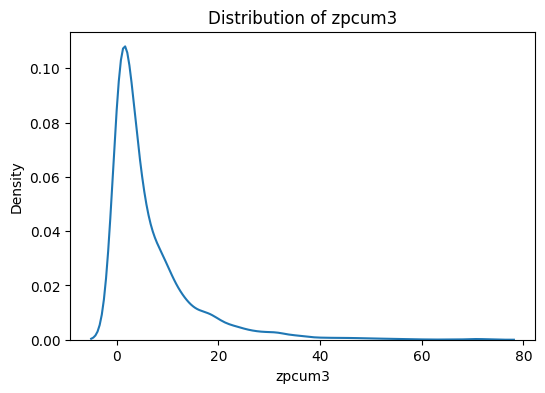

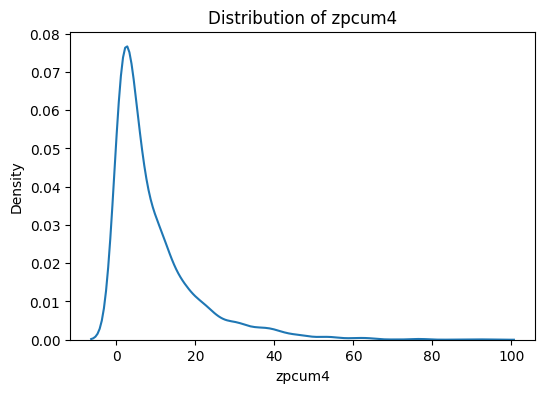

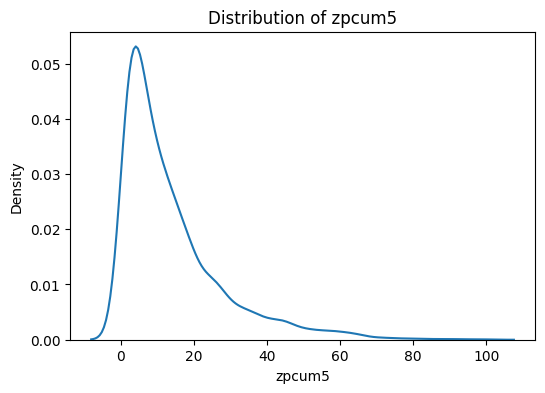

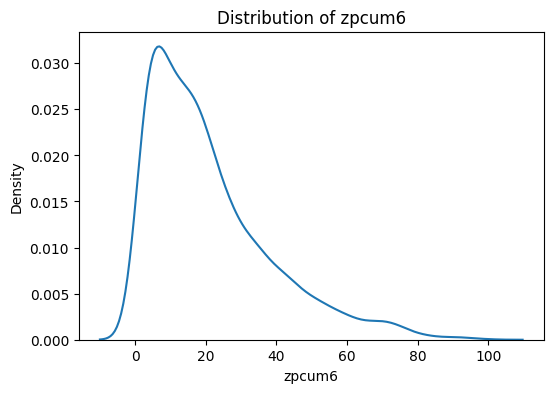

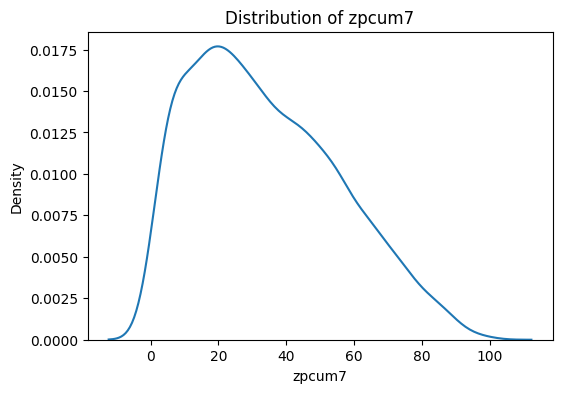

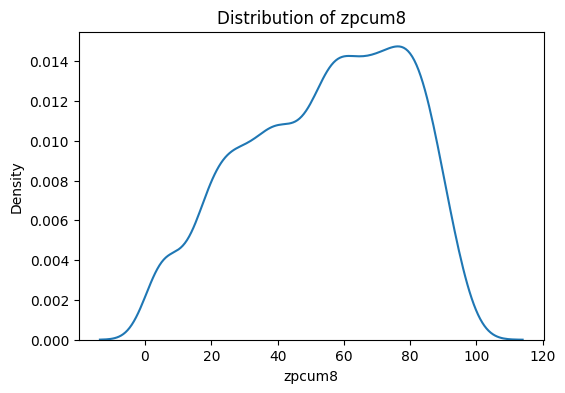

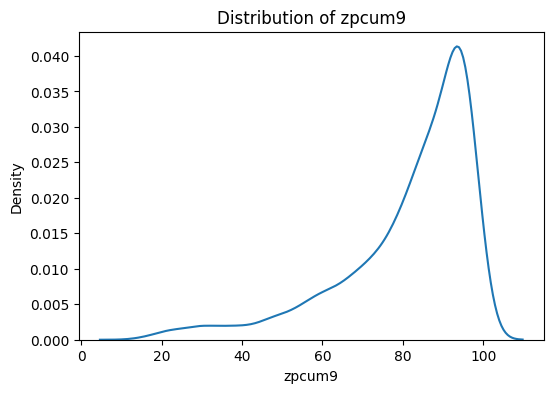

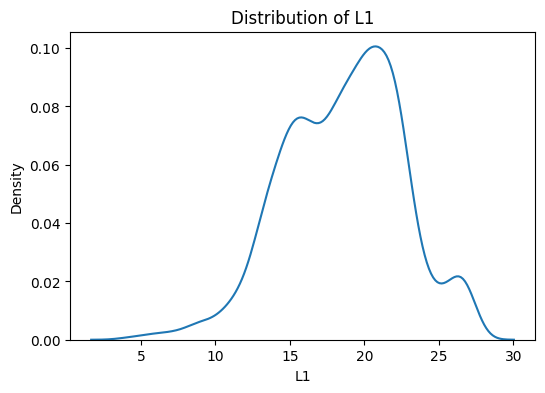

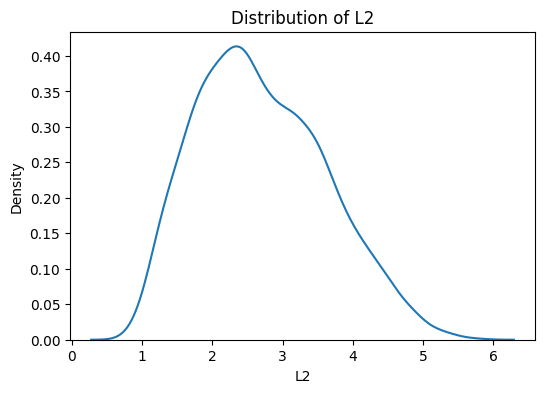

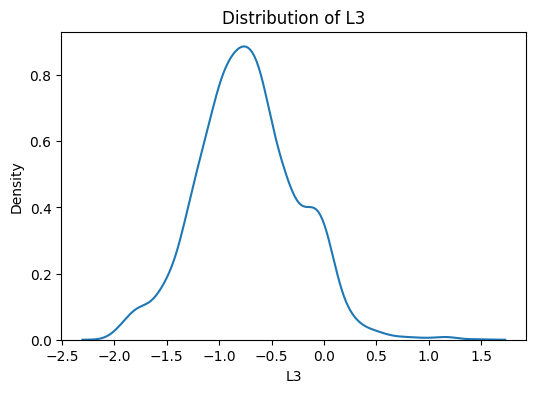

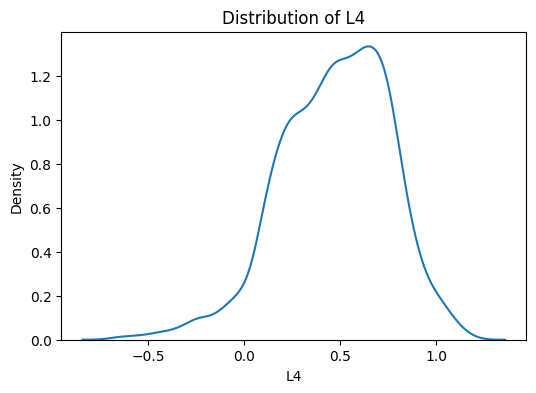

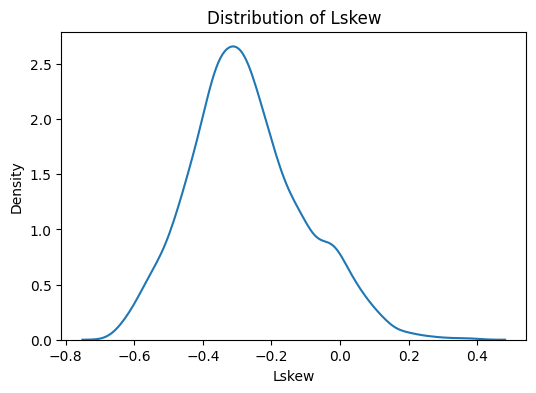

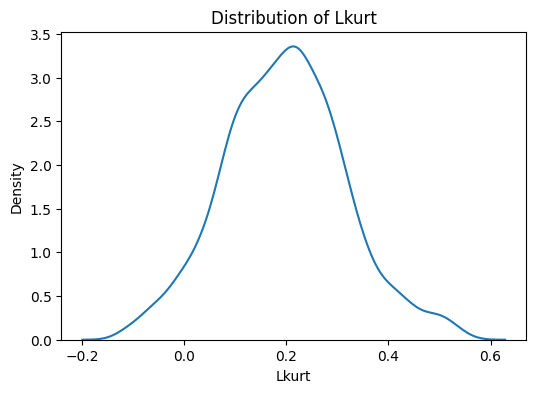

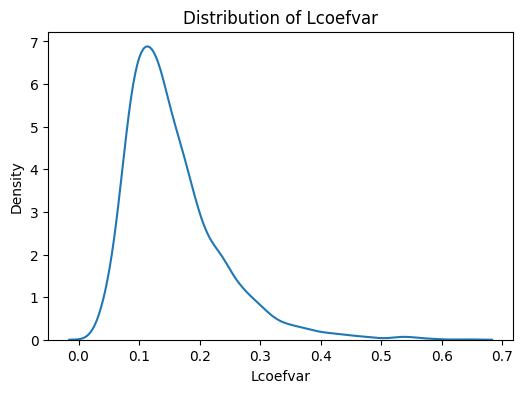

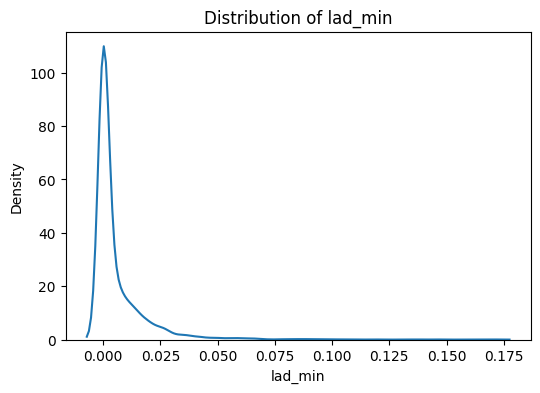

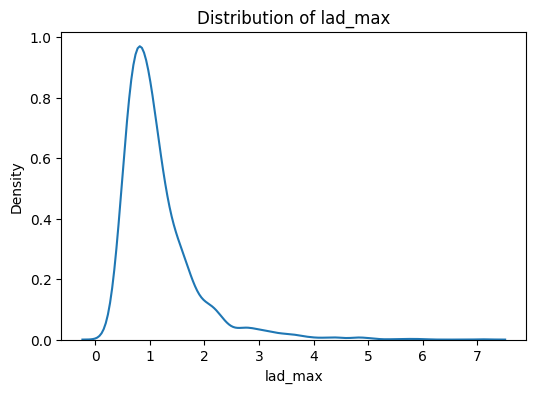

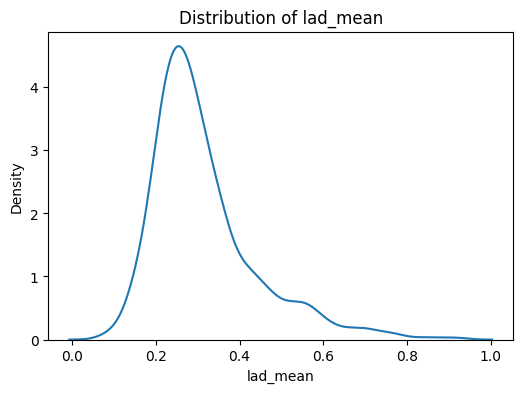

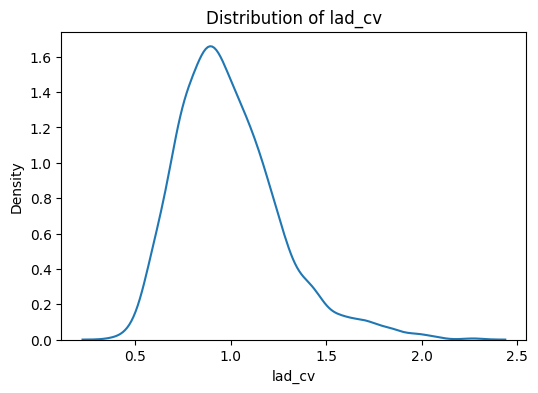

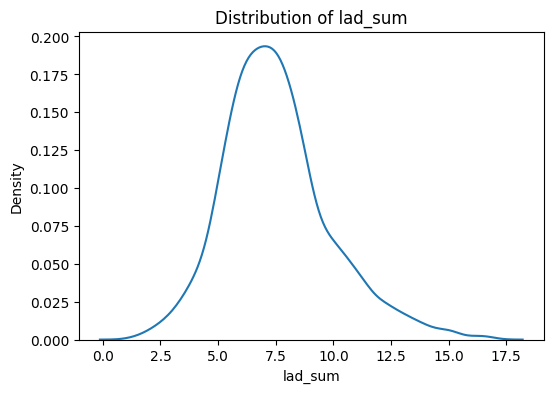

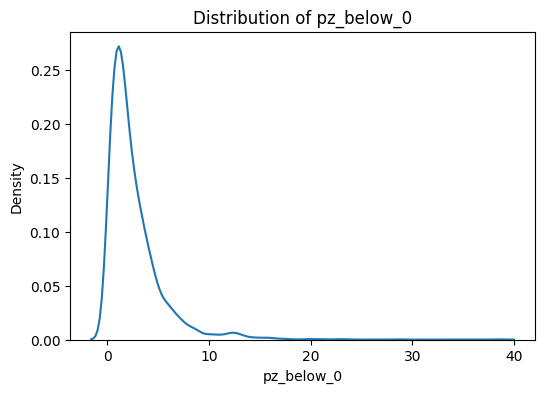

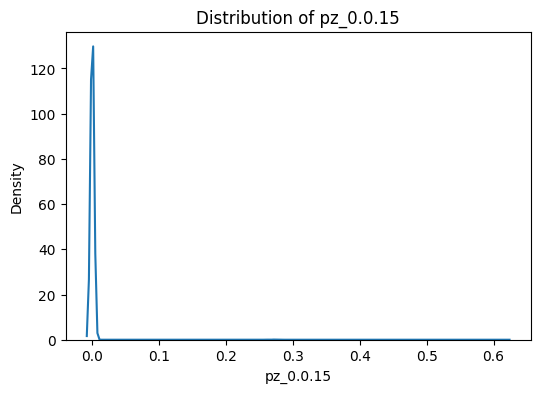

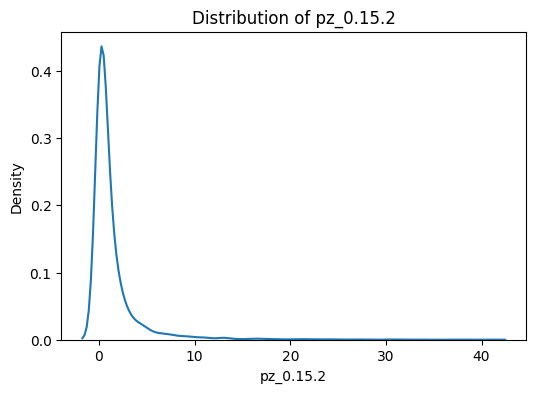

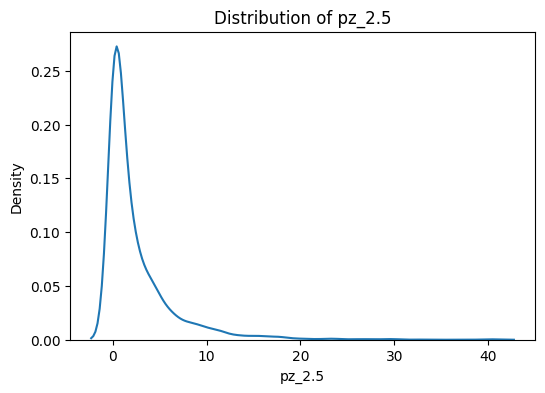

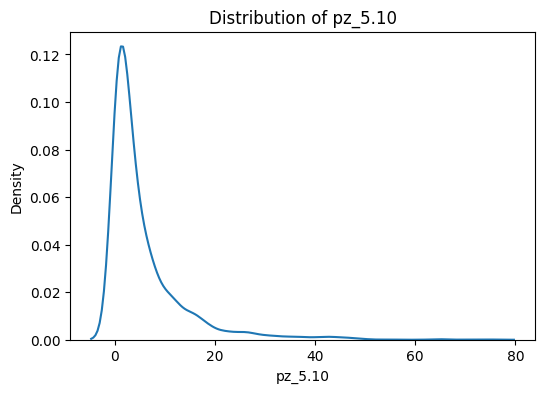

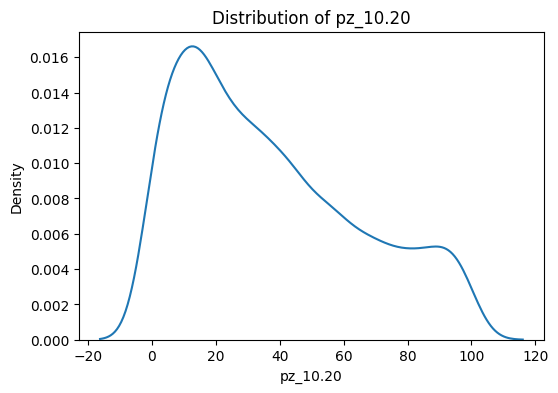

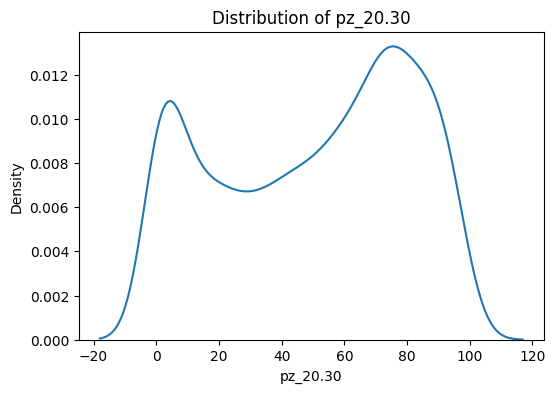

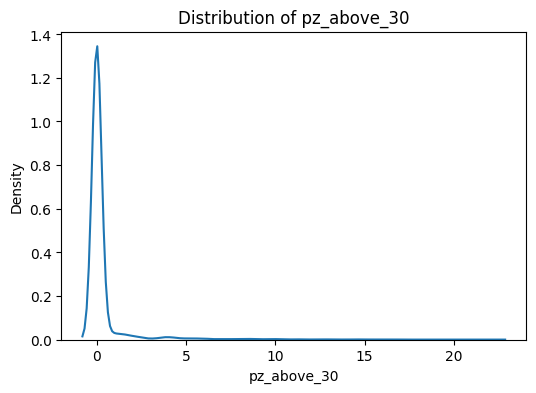

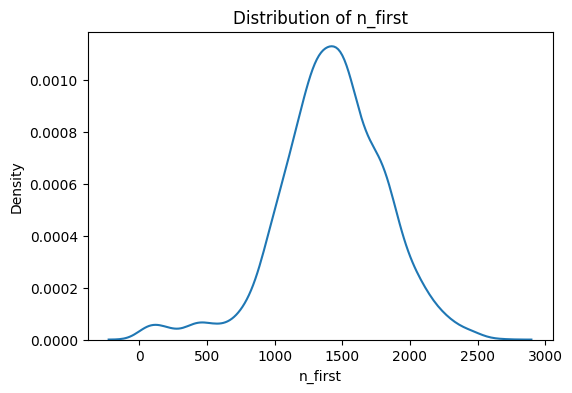

C:\Users\ACER\AppData\Local\Temp\ipykernel_7580\3133943187.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=num_col, data=df)


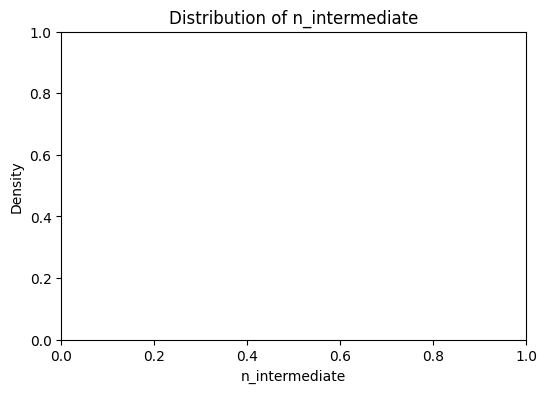

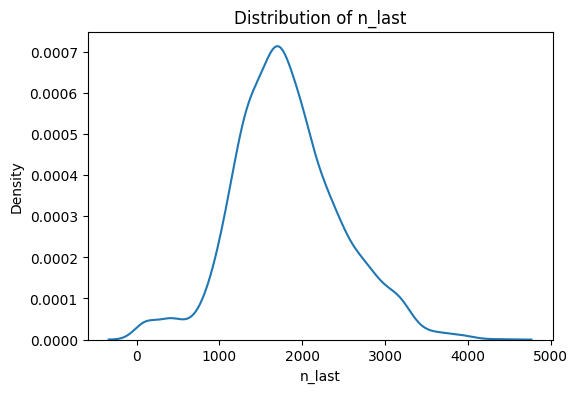

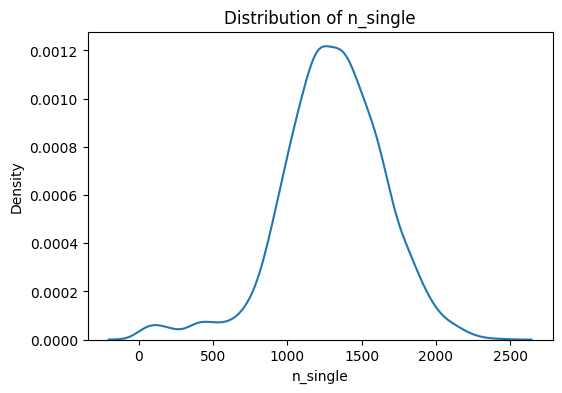

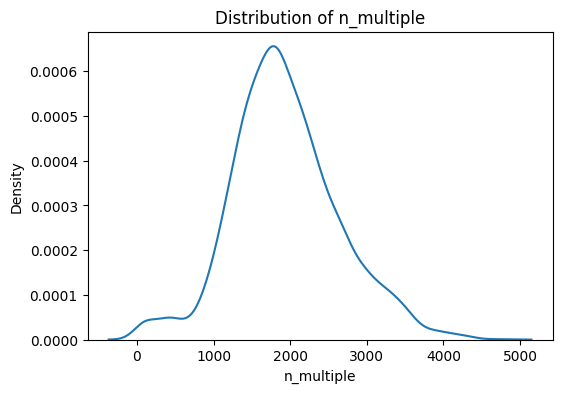

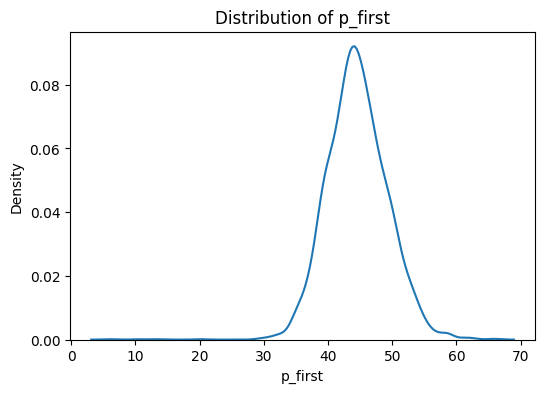

C:\Users\ACER\AppData\Local\Temp\ipykernel_7580\3133943187.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=num_col, data=df)


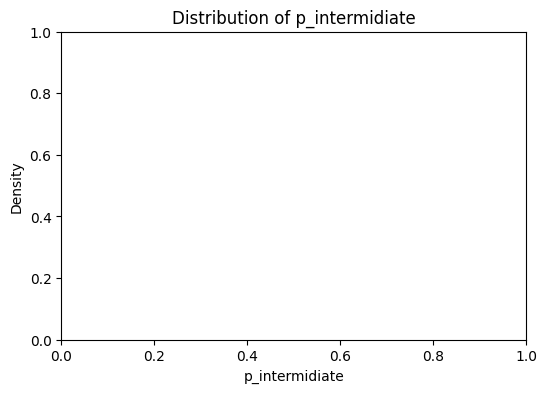

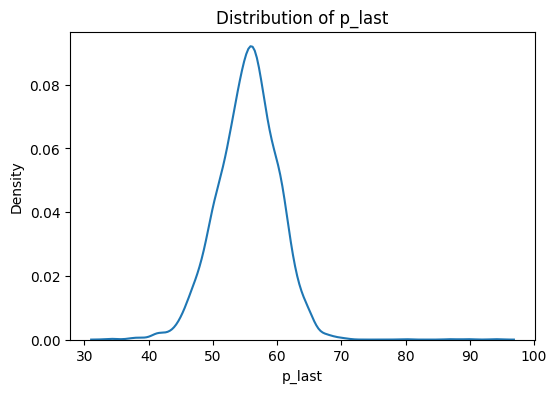

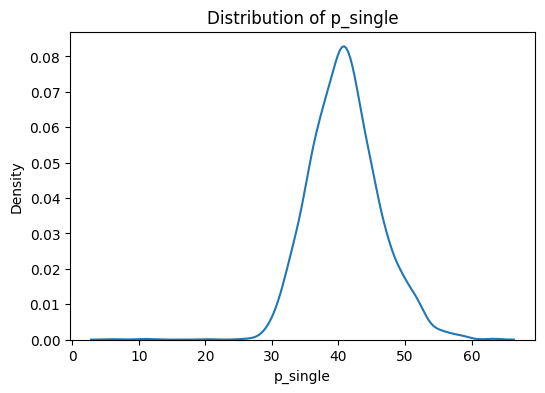

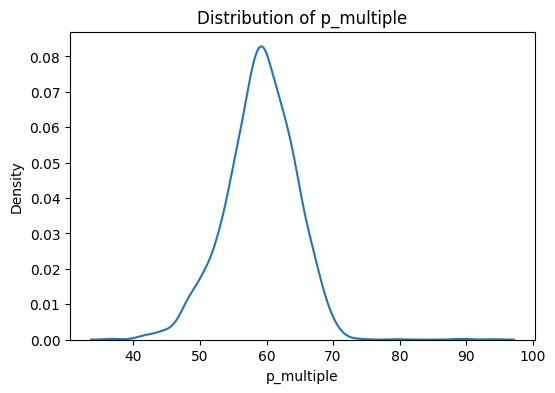

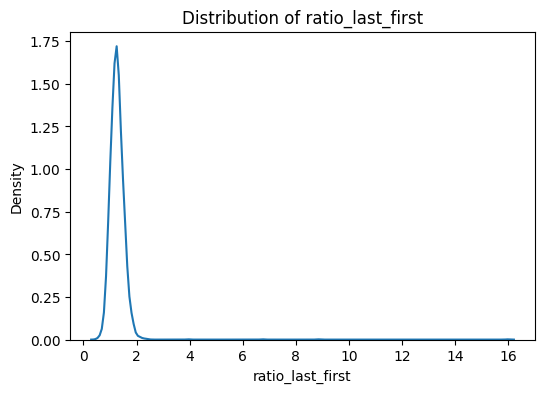

C:\Users\ACER\AppData\Local\Temp\ipykernel_7580\3133943187.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=num_col, data=df)


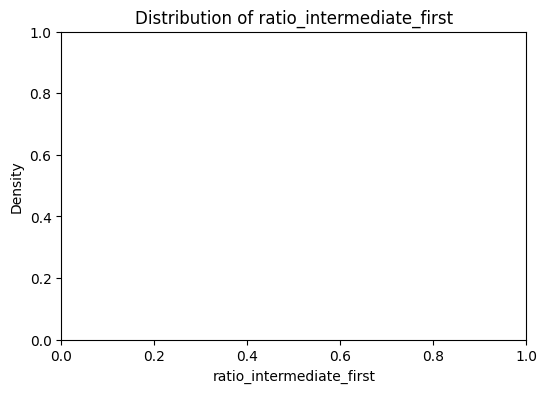

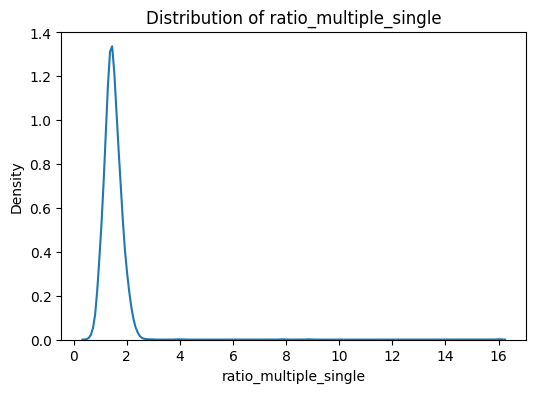

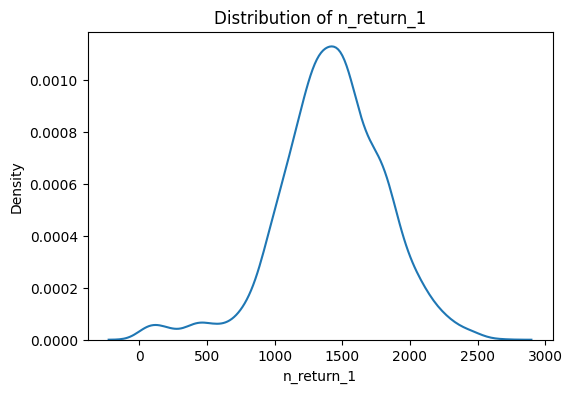

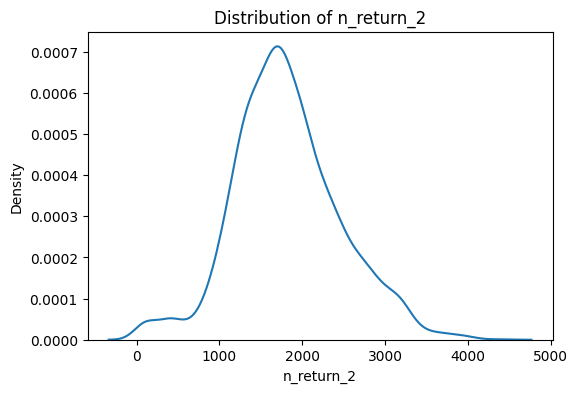

C:\Users\ACER\AppData\Local\Temp\ipykernel_7580\3133943187.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=num_col, data=df)


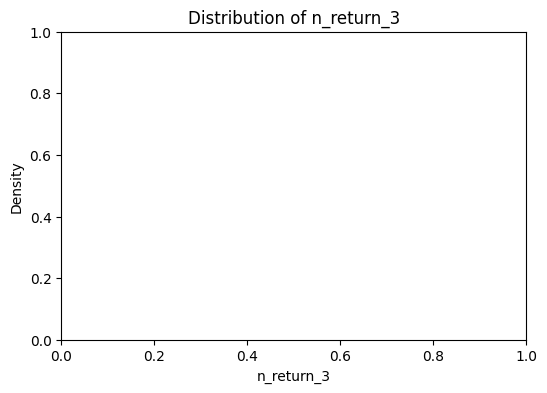

C:\Users\ACER\AppData\Local\Temp\ipykernel_7580\3133943187.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=num_col, data=df)


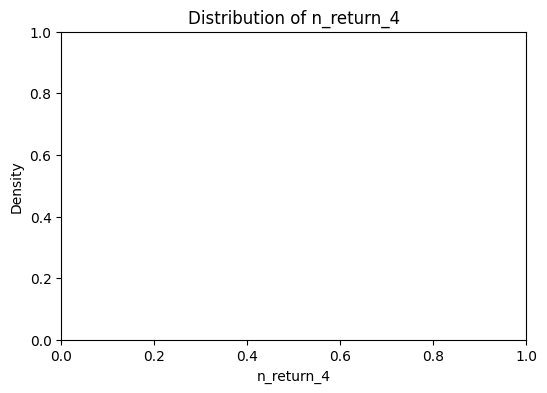

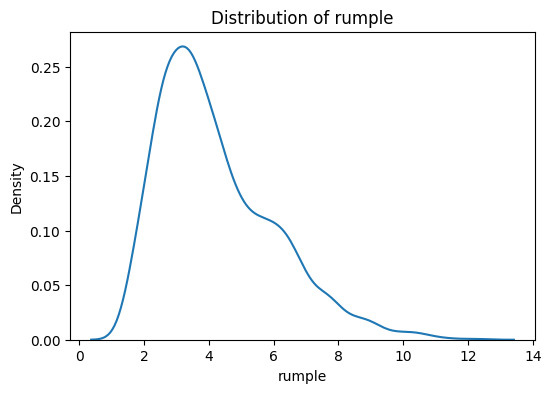

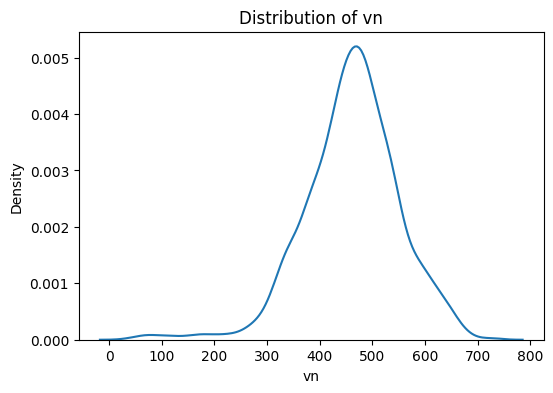

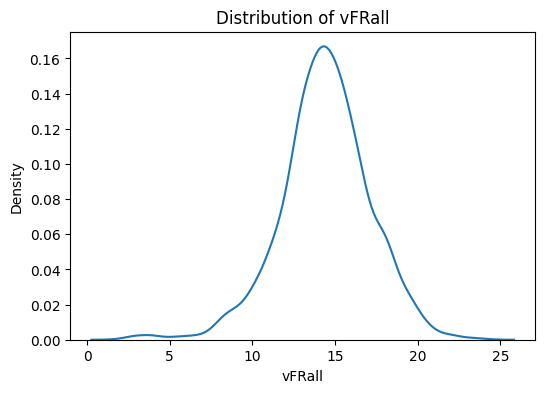

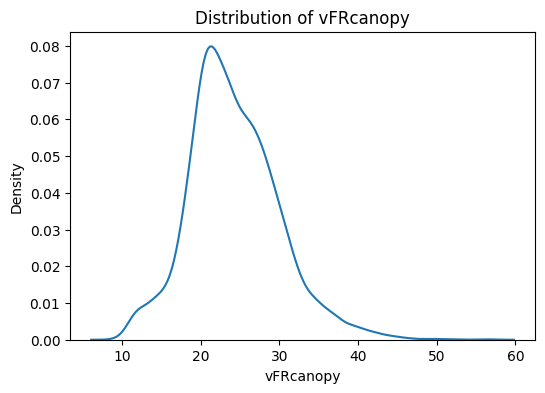

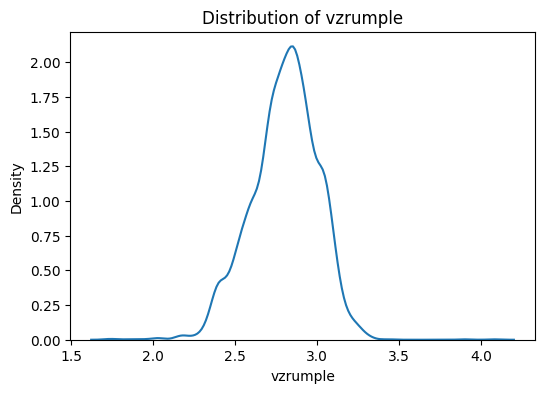

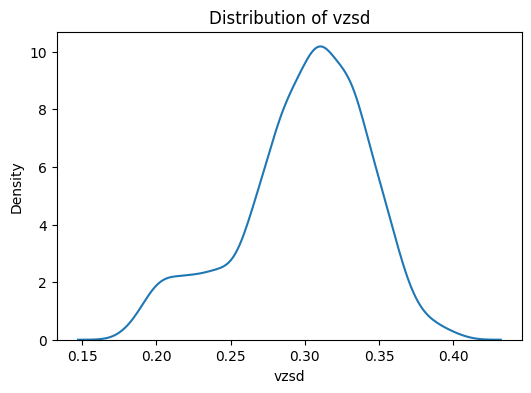

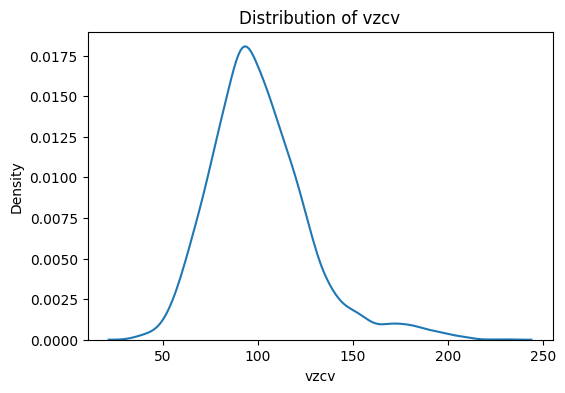

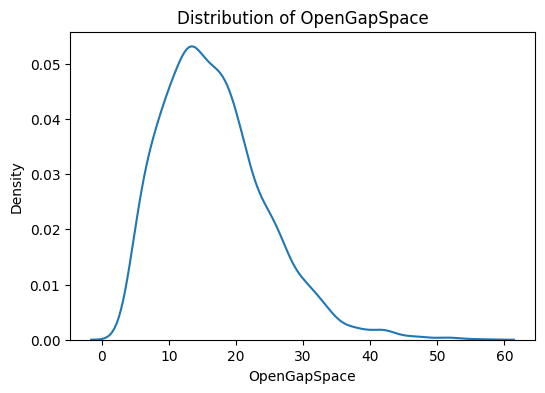

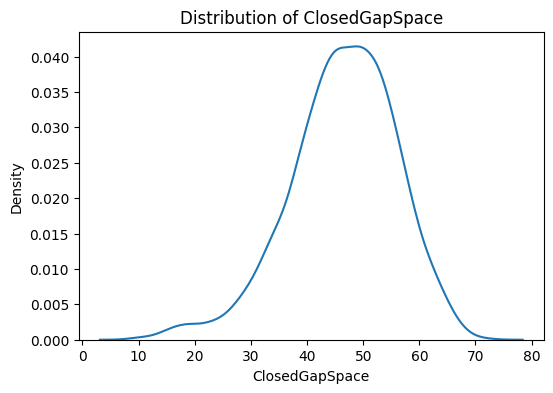

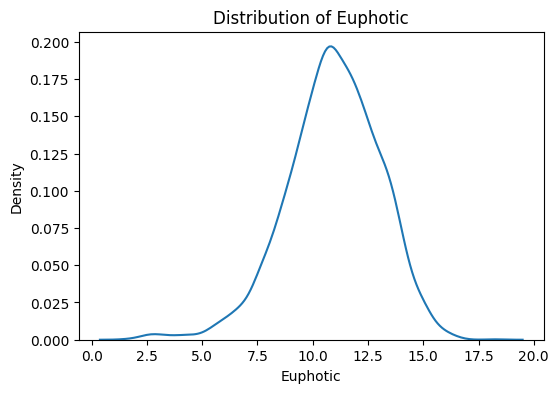

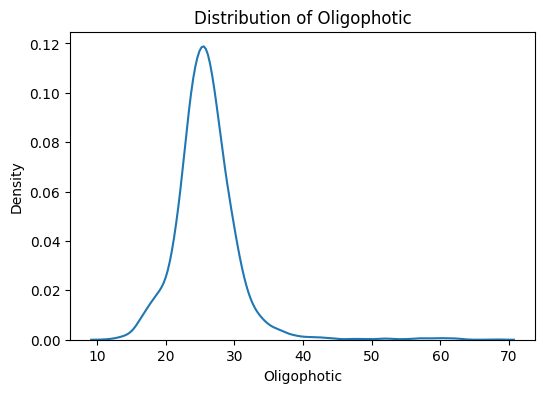

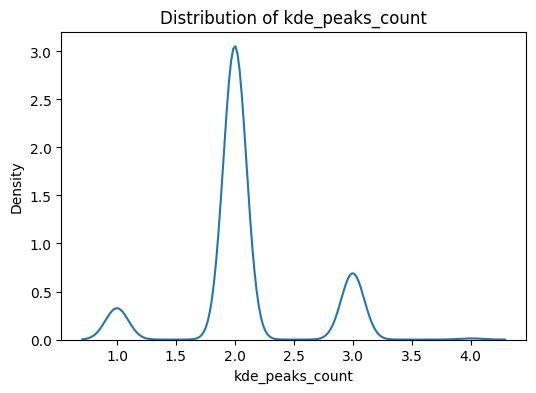

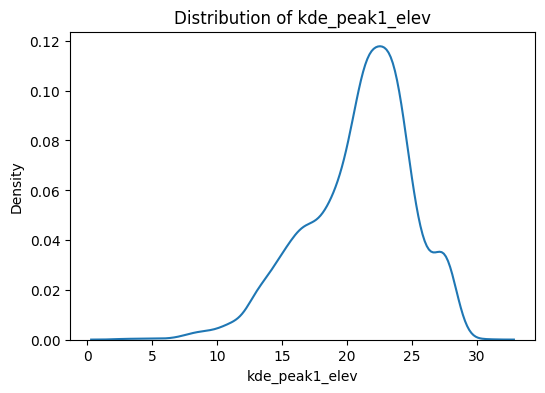

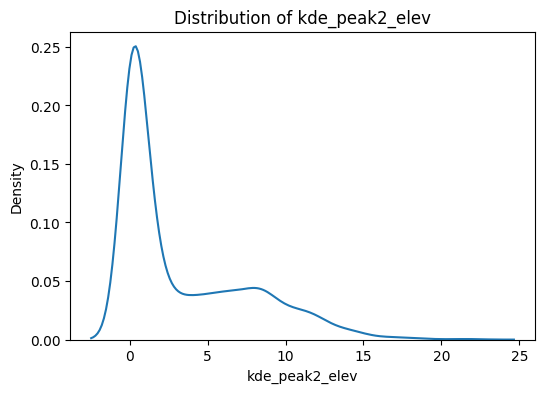

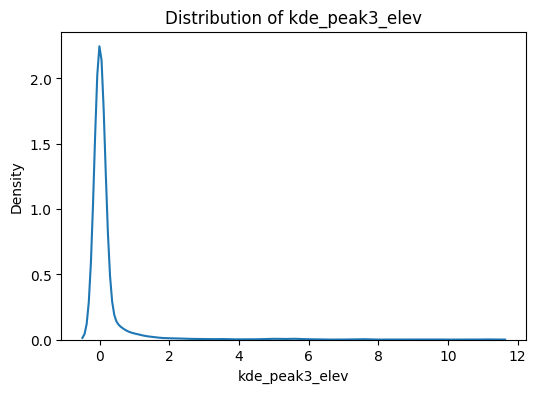

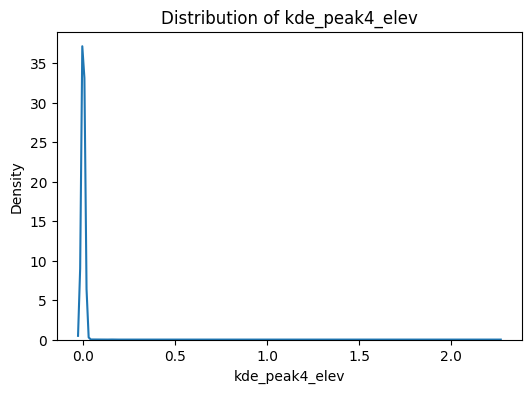

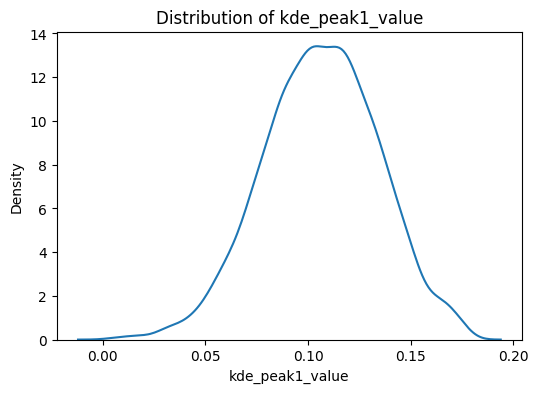

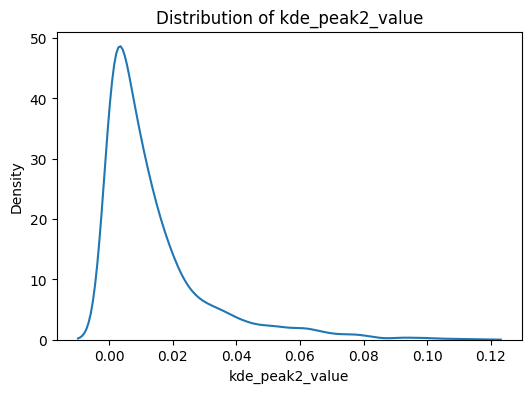

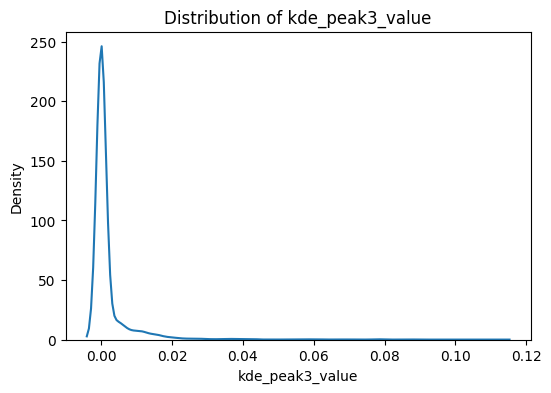

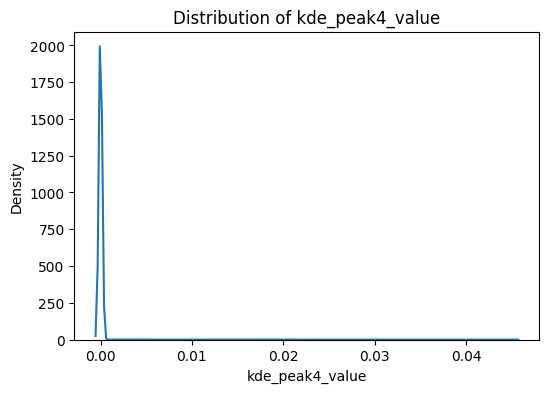

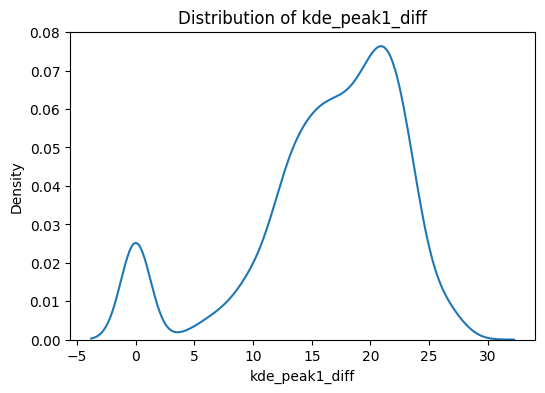

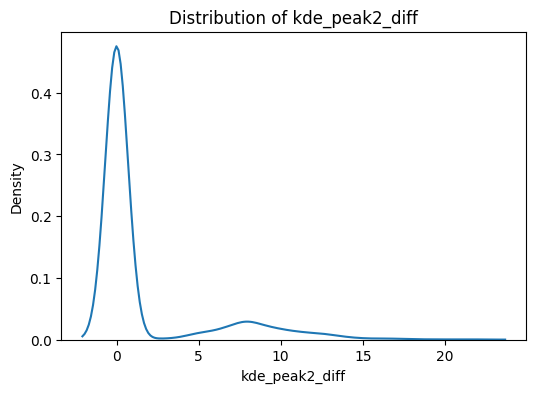

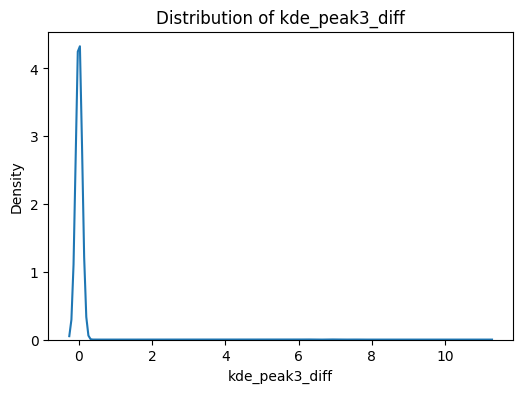

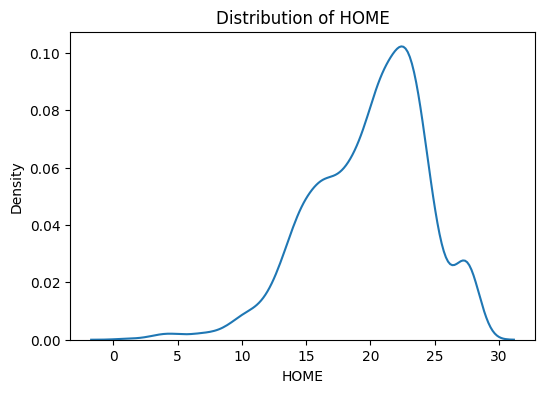

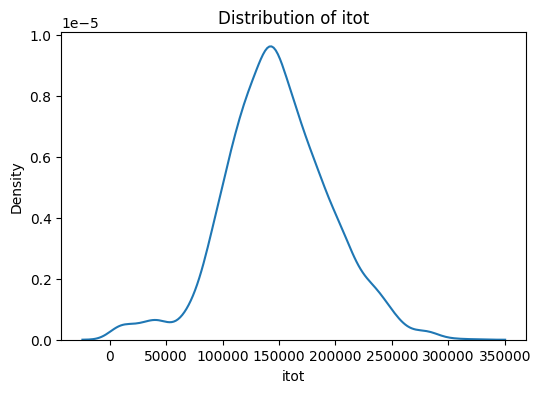

C:\Users\ACER\AppData\Local\Temp\ipykernel_7580\3133943187.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=num_col, data=df)


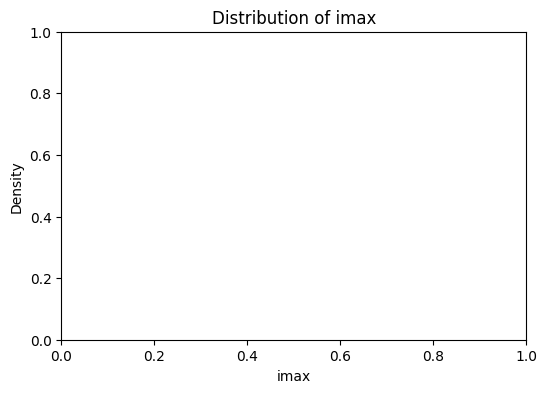

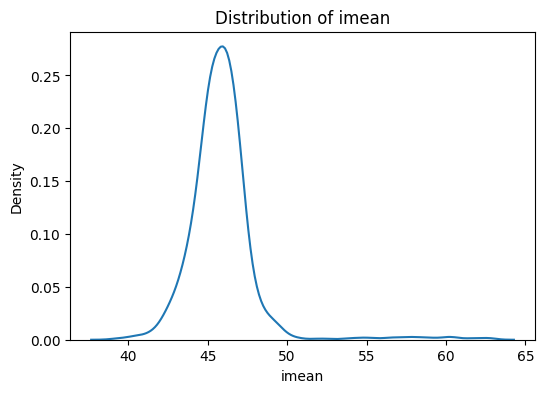

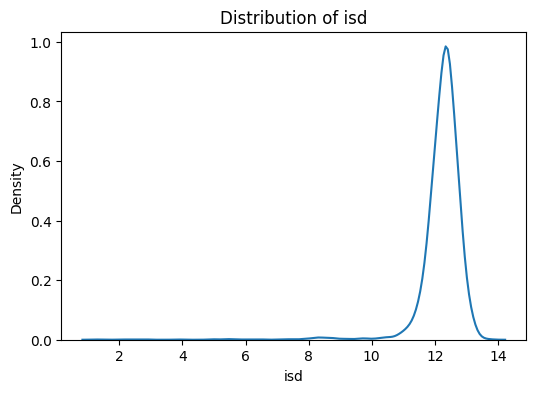

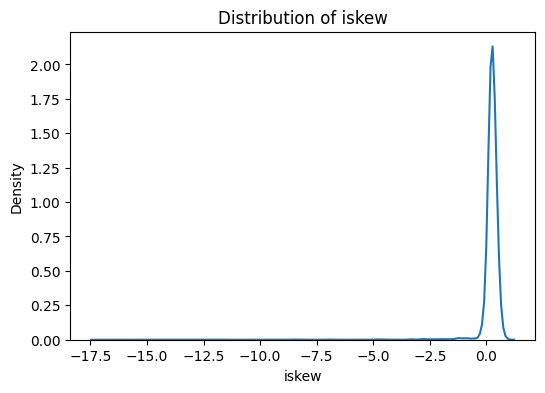

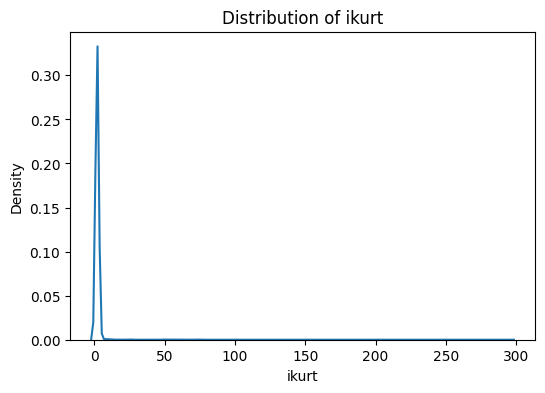

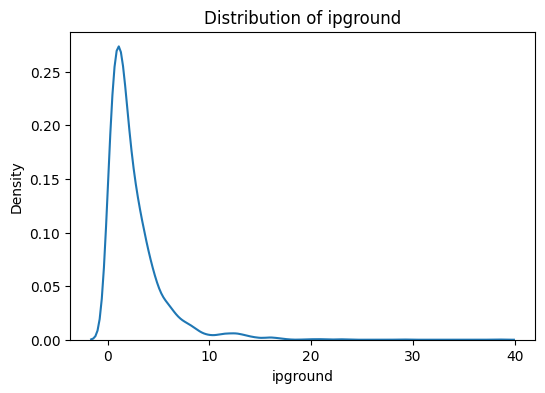

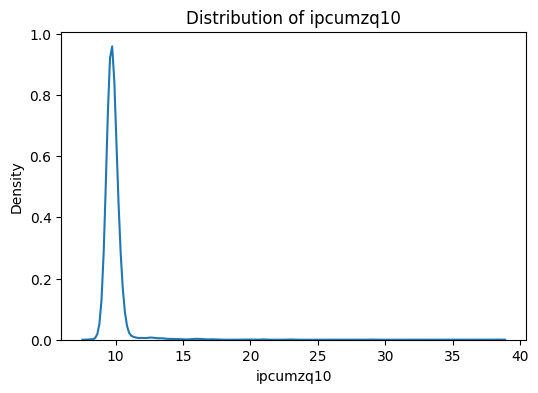

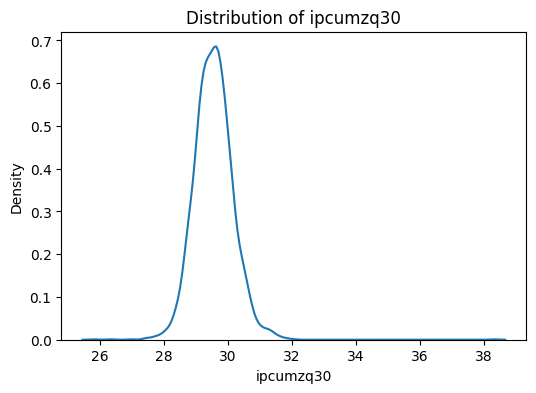

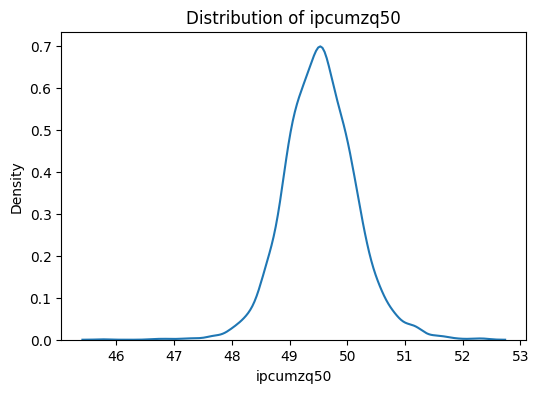

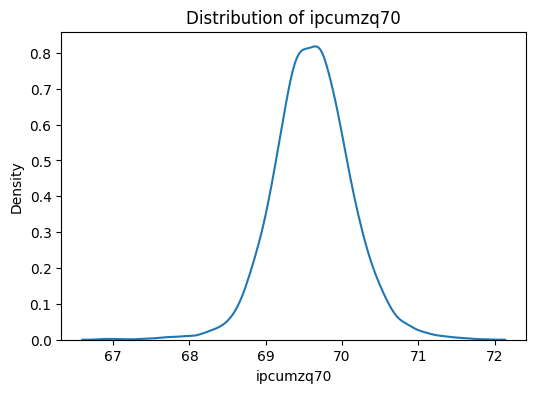

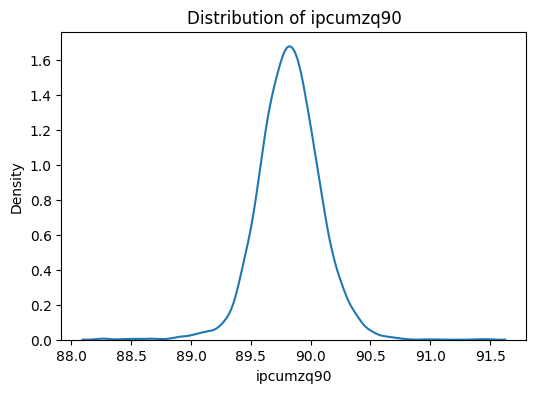

In [42]:
# Create kernel density estimate (KDE) plot for each column by class
#sns.kdeplot(data=tips, x="total_bill")
for num_col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(x=num_col, data=df)
    plt.title(f'Distribution of {num_col}')
    plt.show()


Boxplots for Numerical Columns by Categorical Columns:


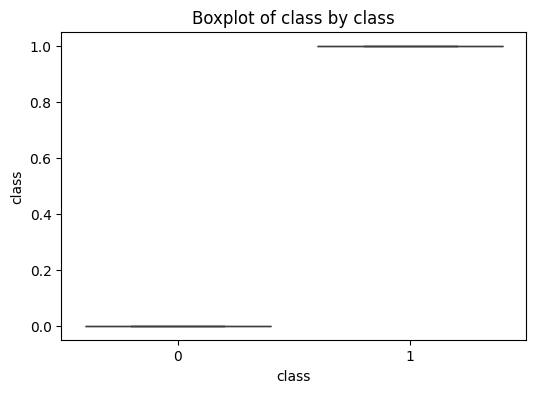

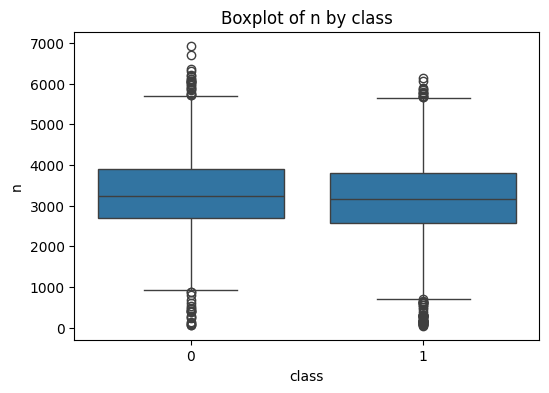

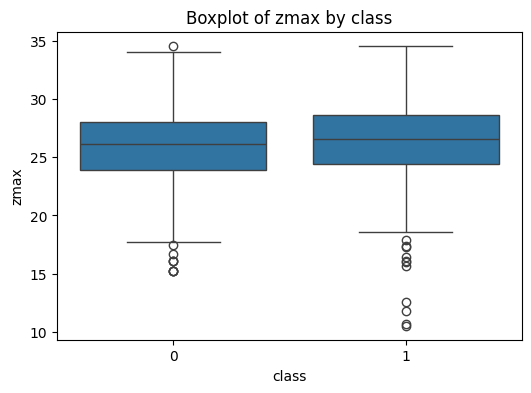

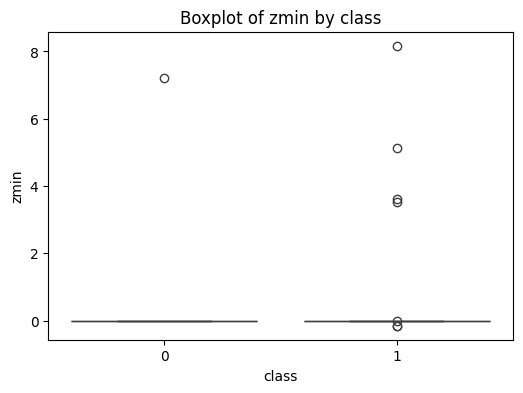

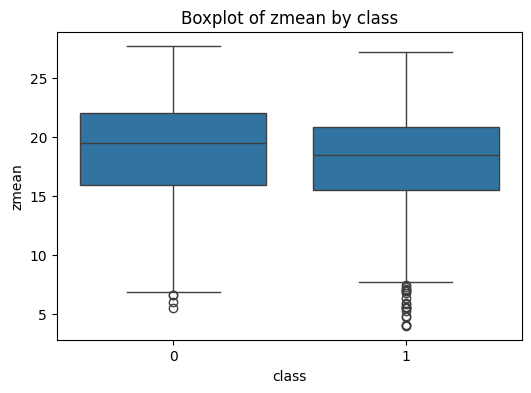

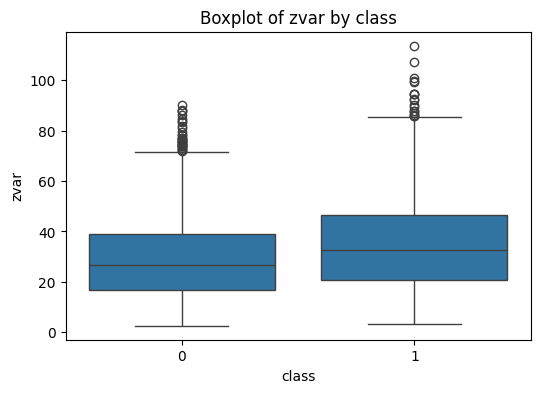

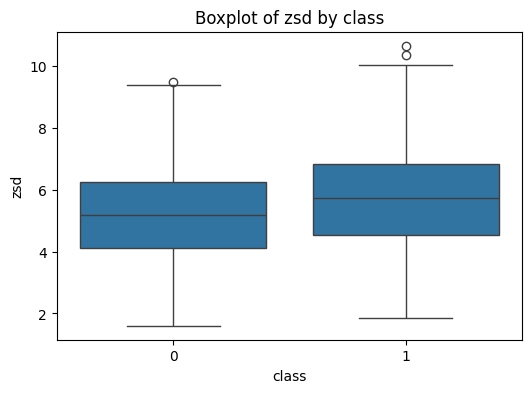

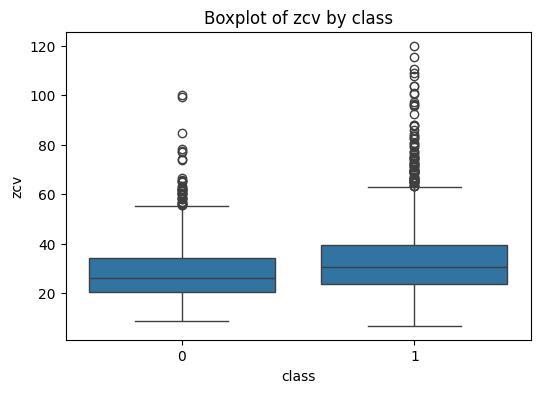

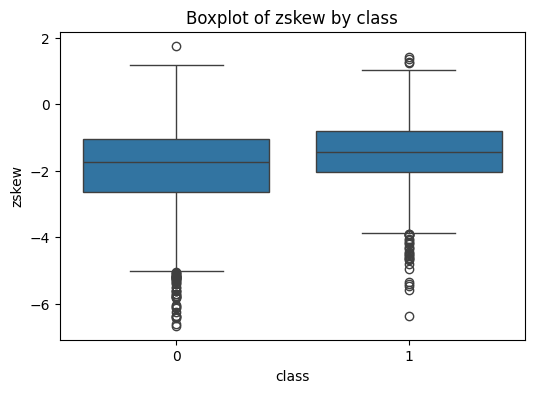

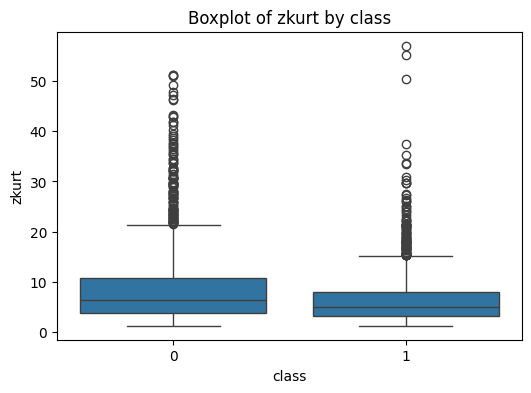

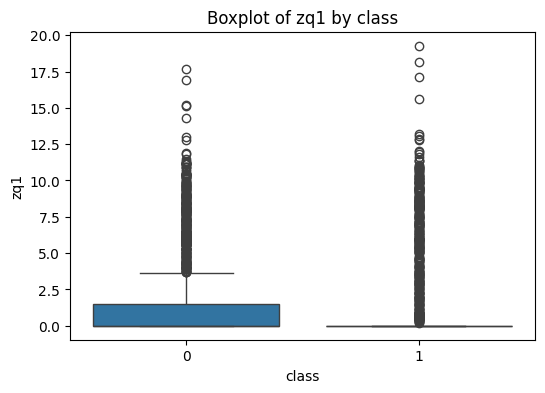

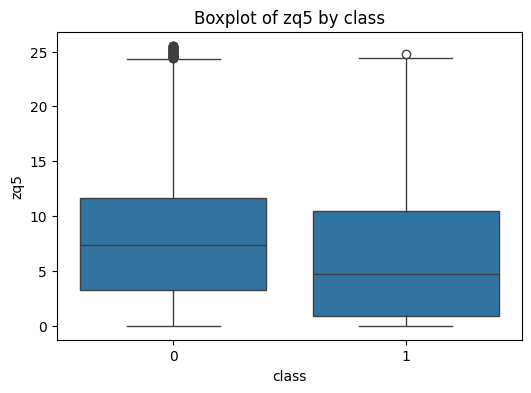

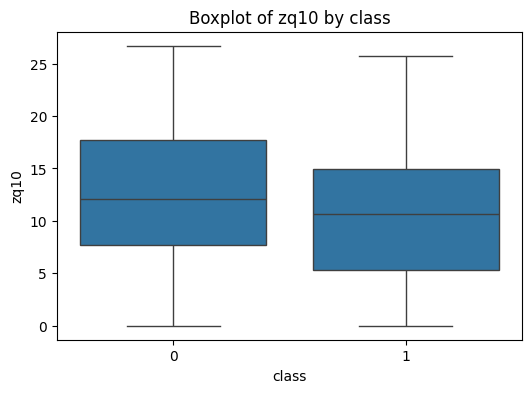

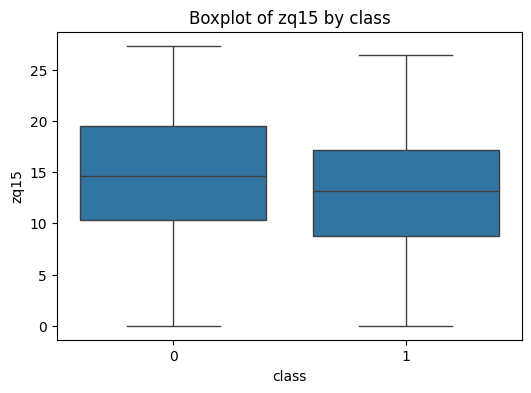

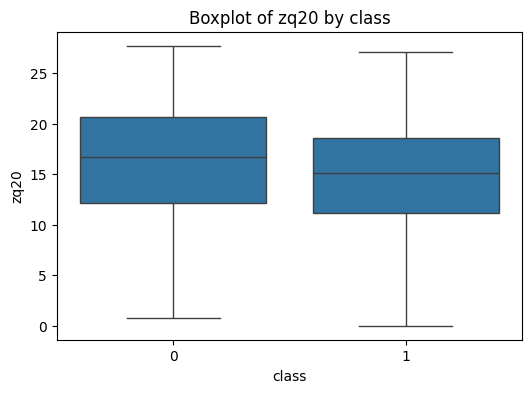

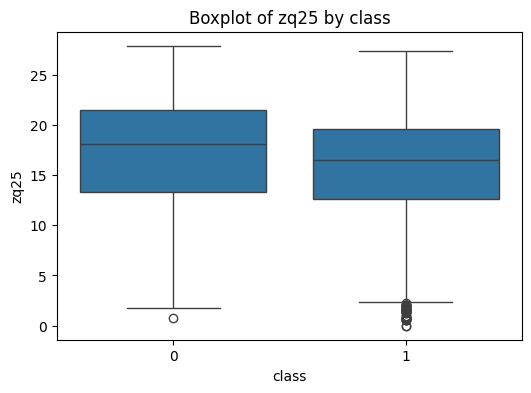

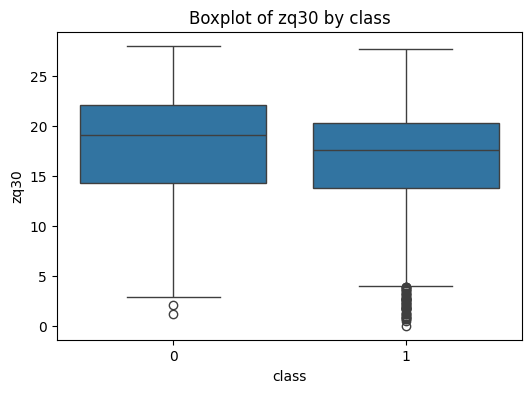

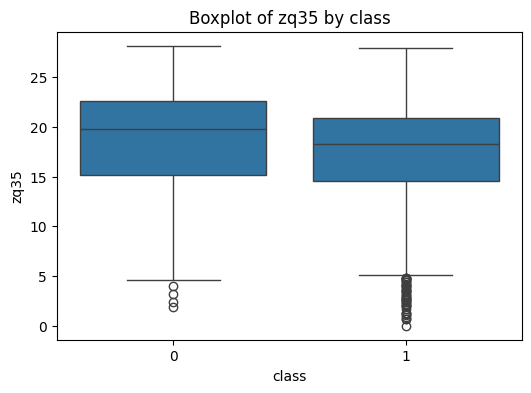

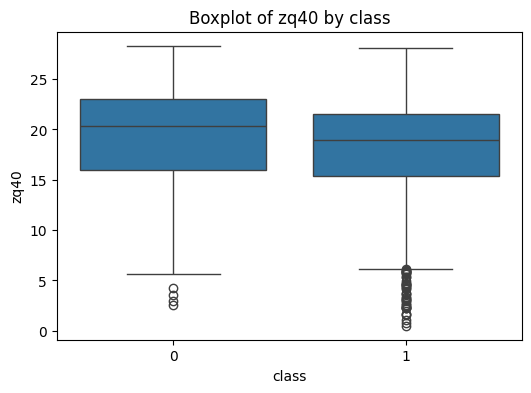

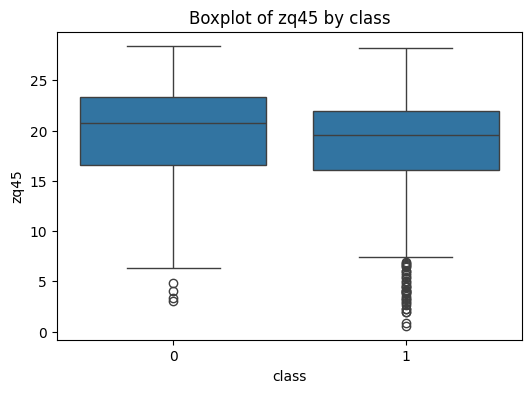

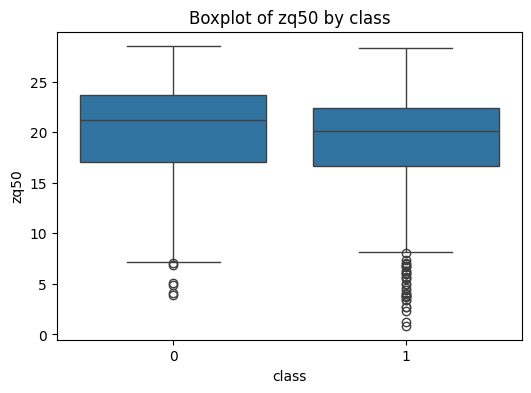

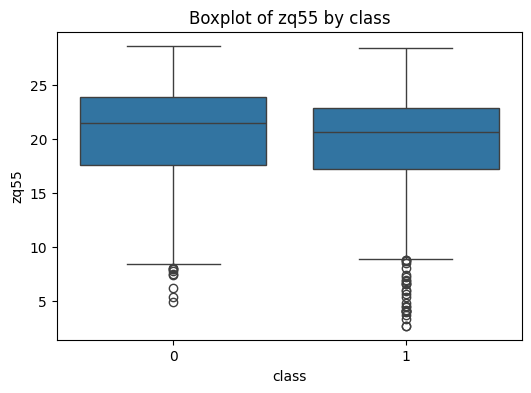

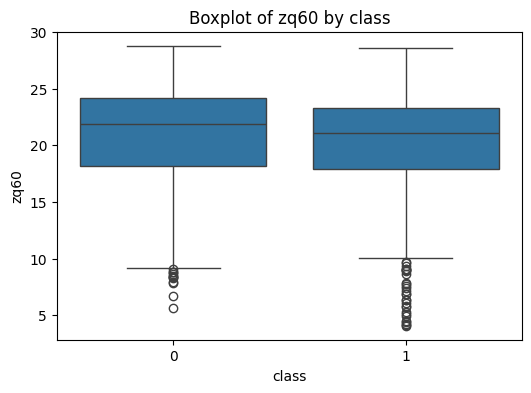

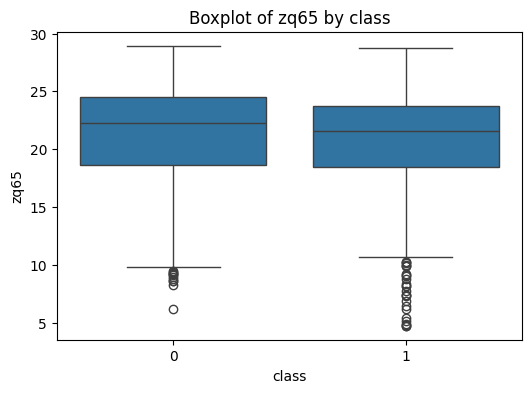

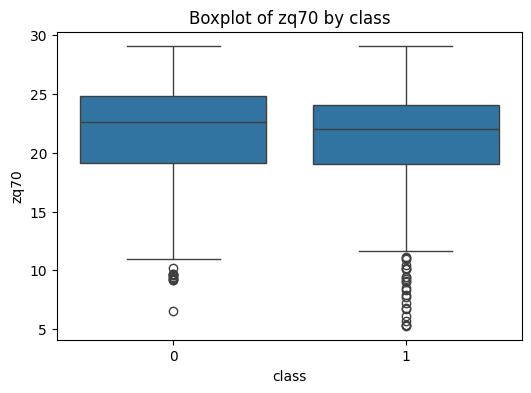

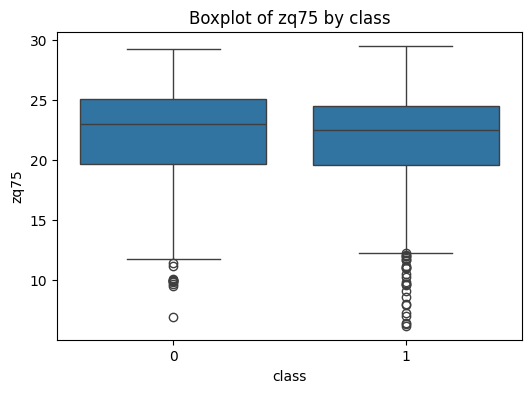

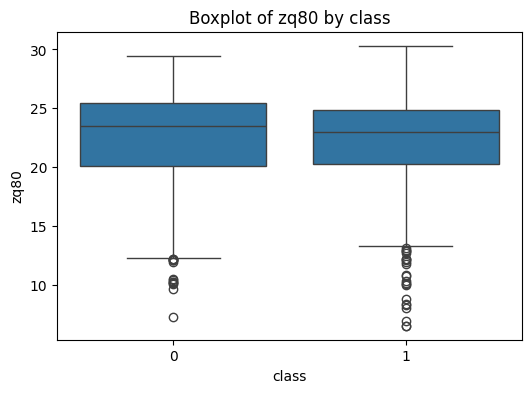

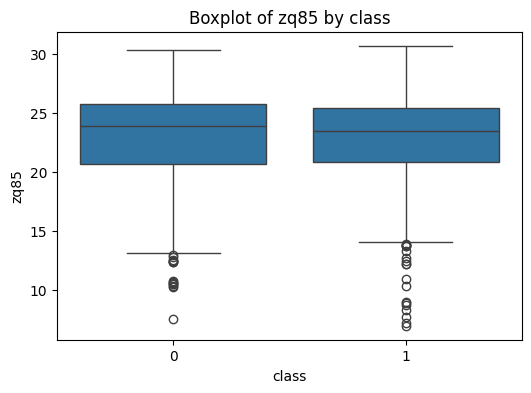

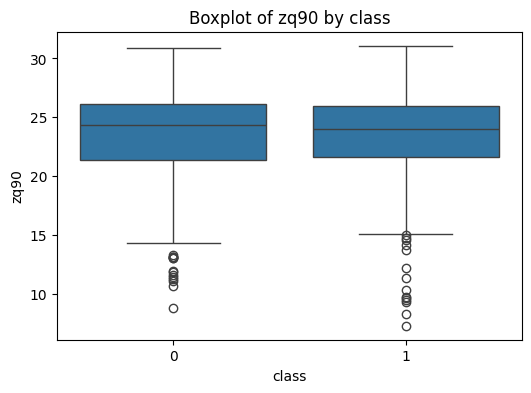

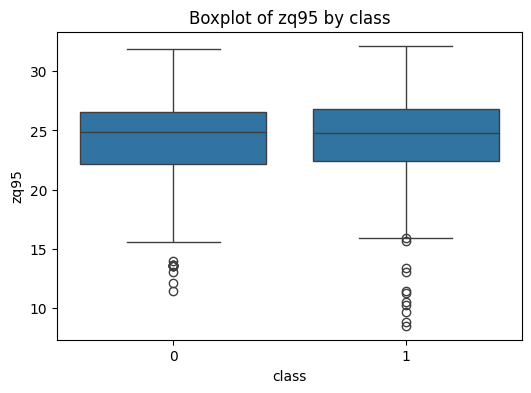

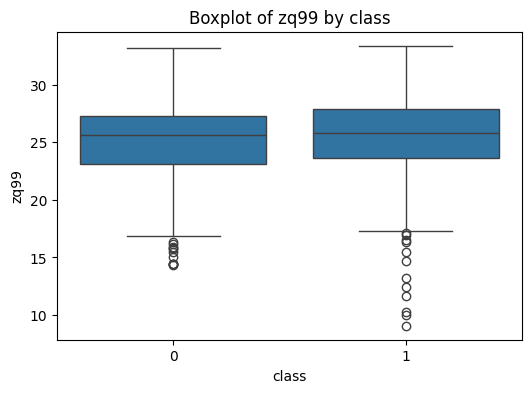

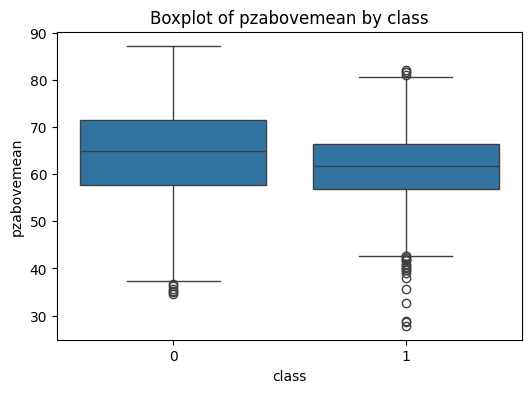

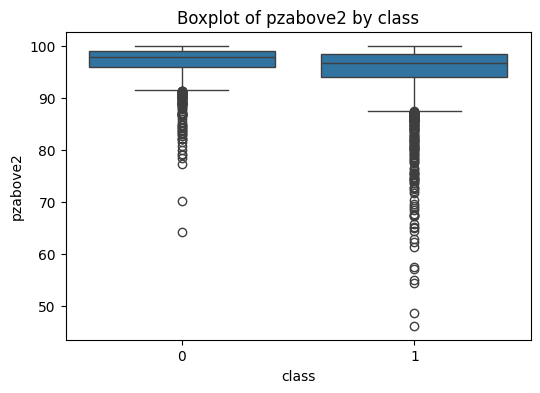

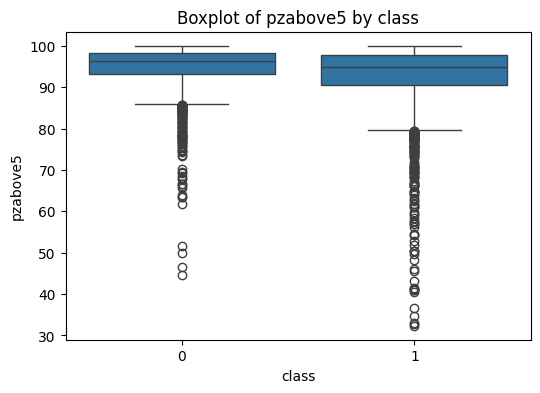

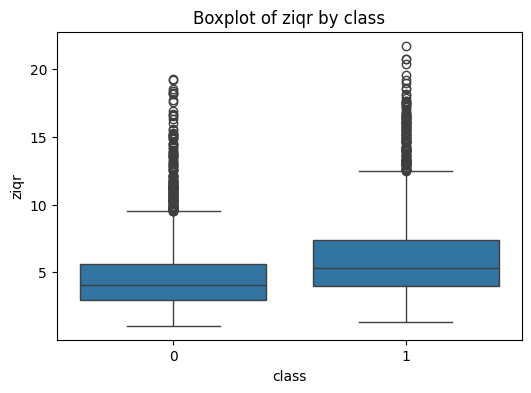

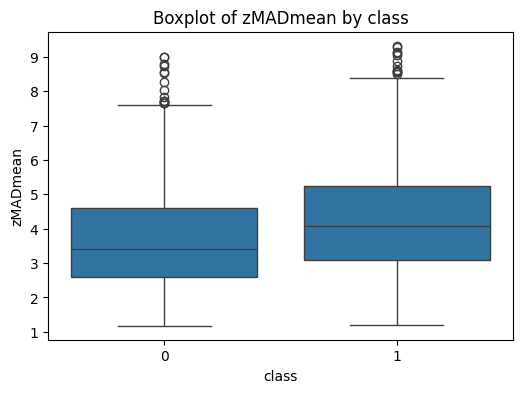

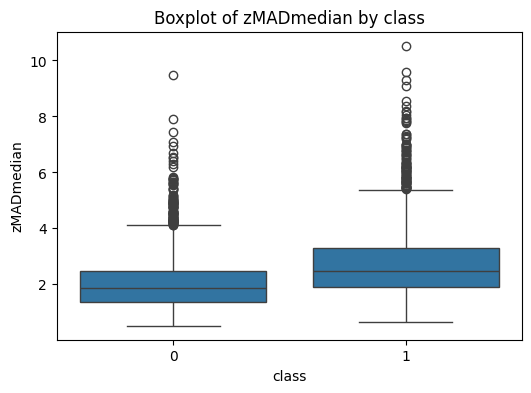

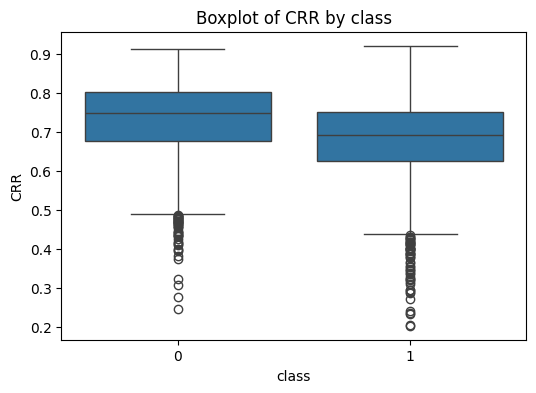

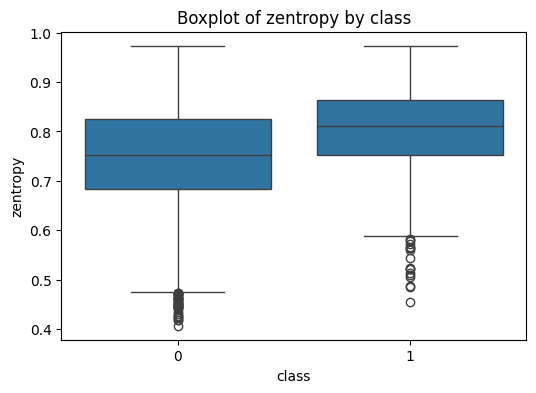

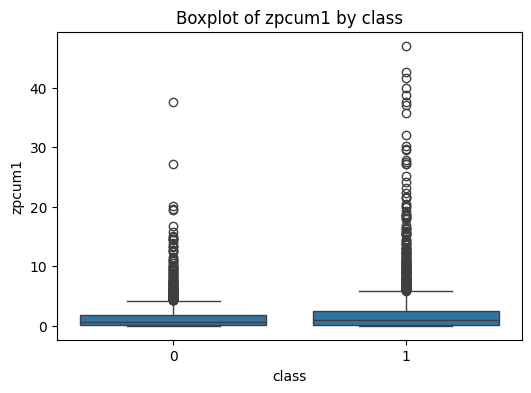

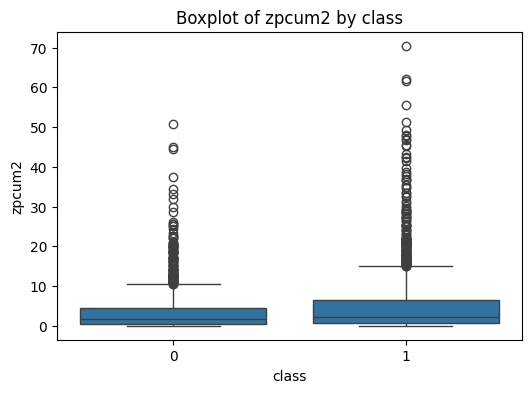

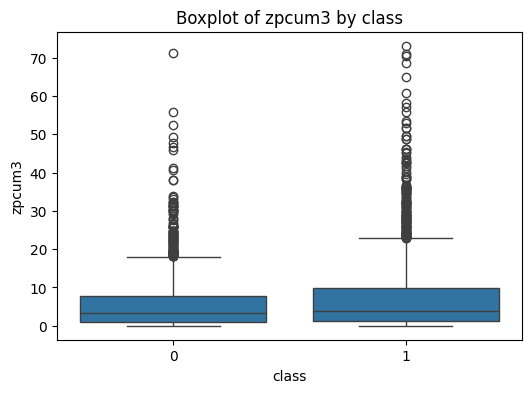

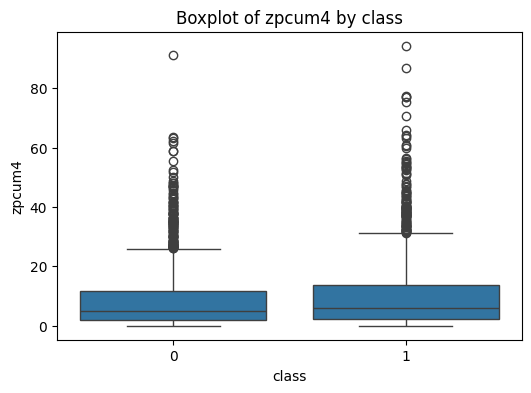

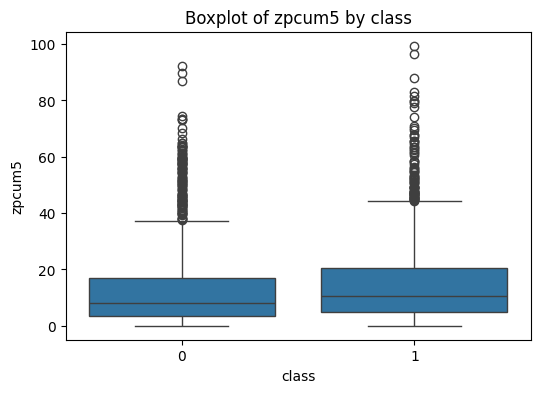

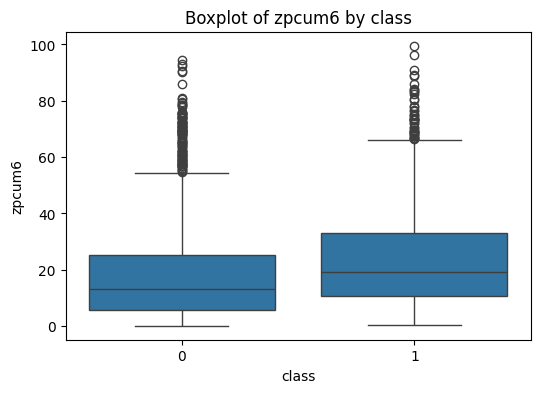

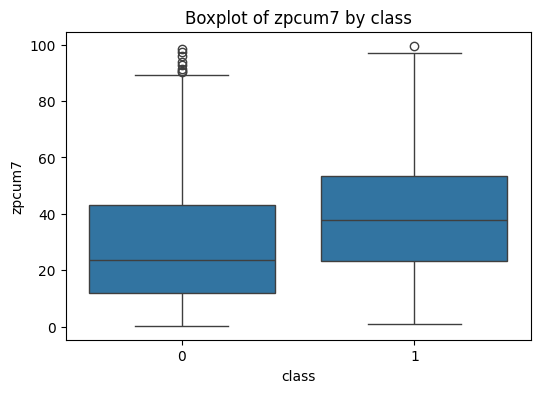

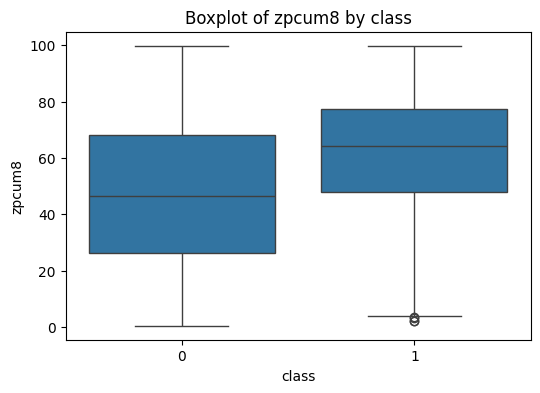

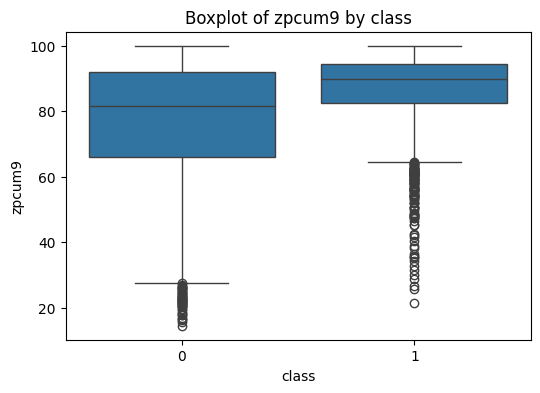

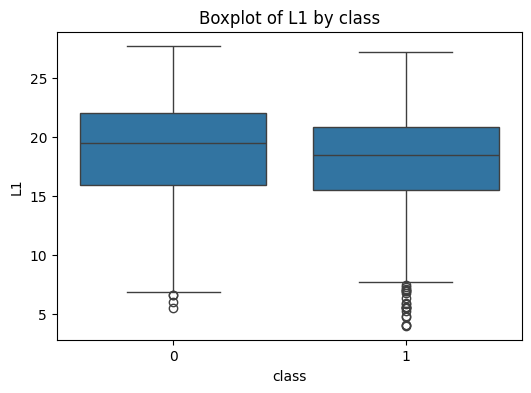

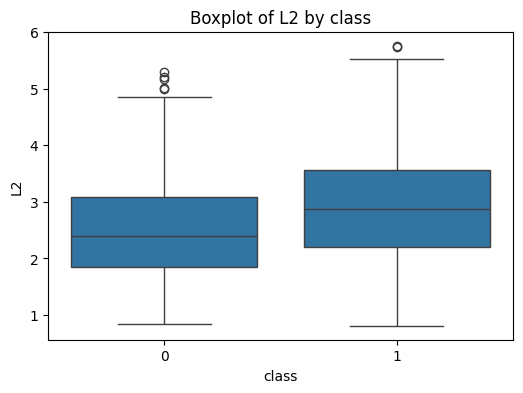

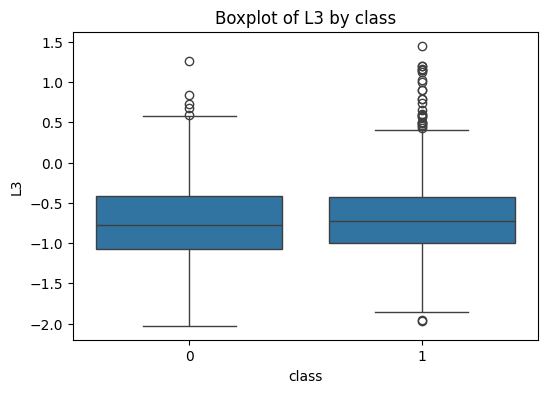

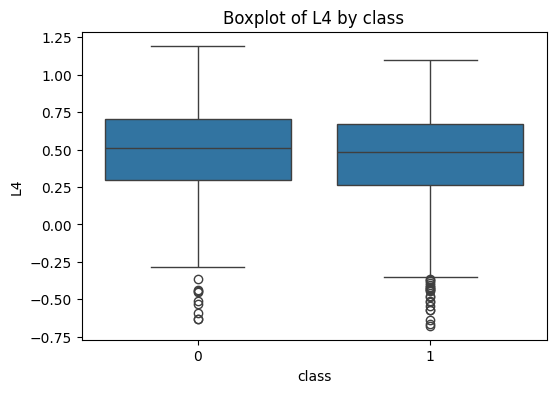

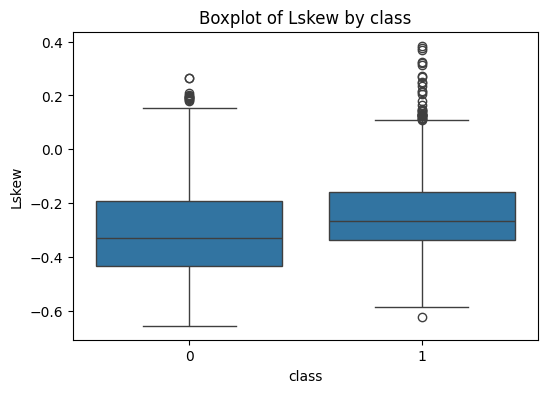

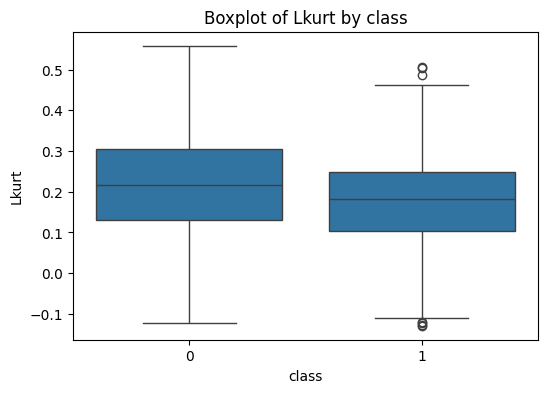

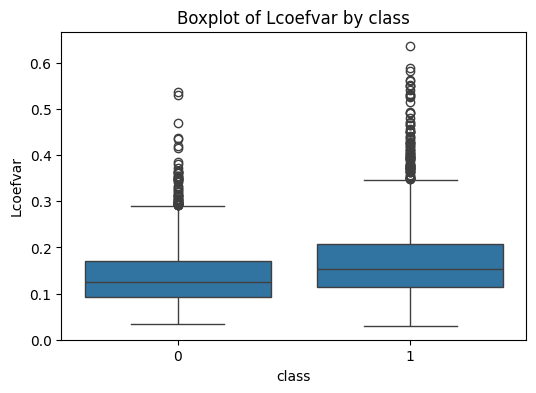

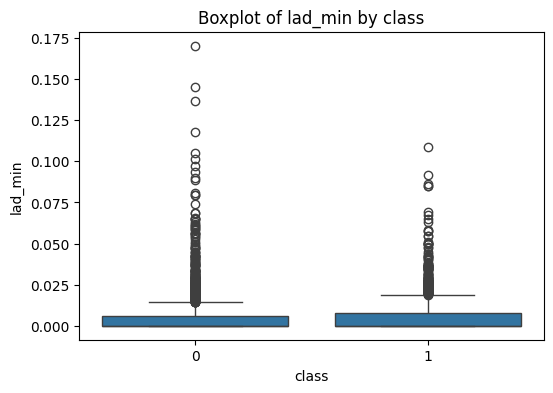

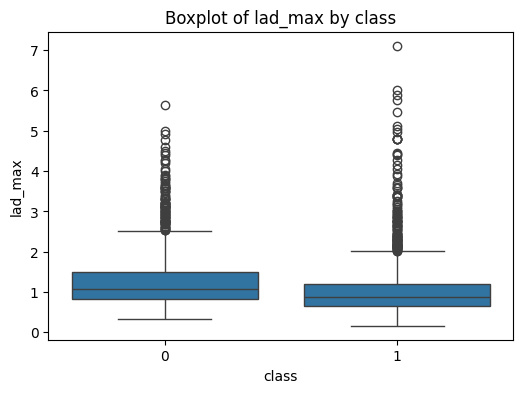

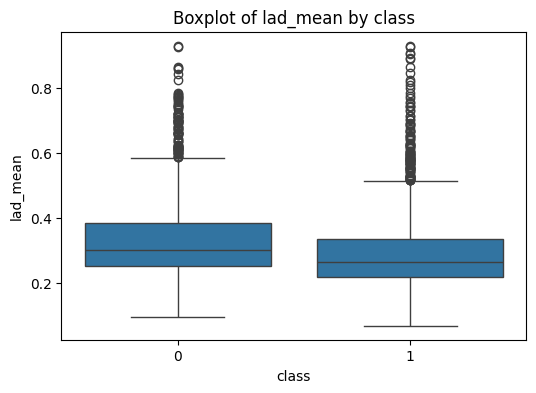

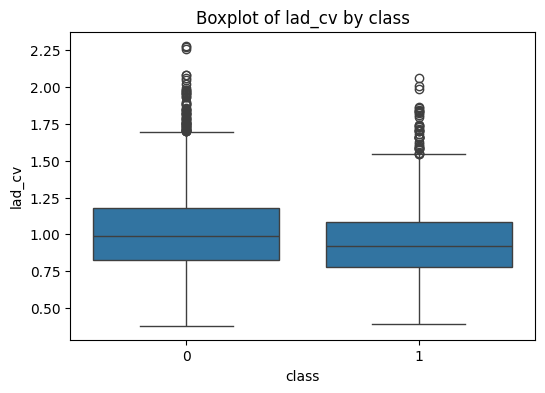

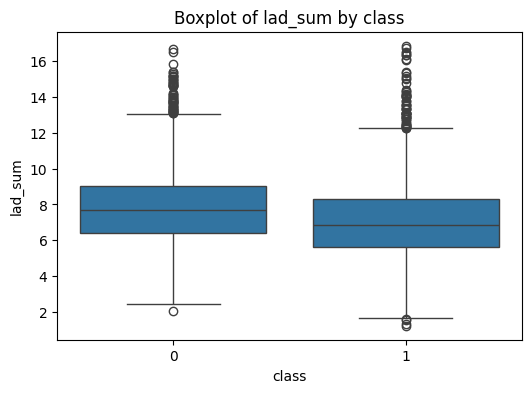

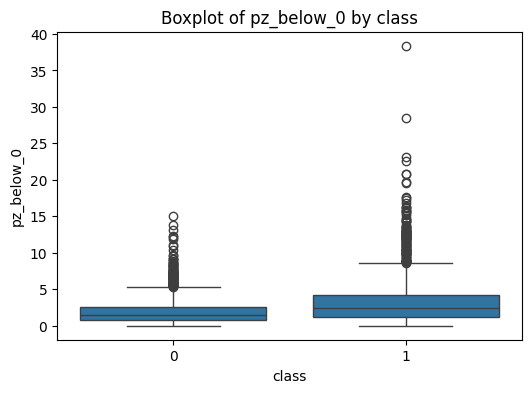

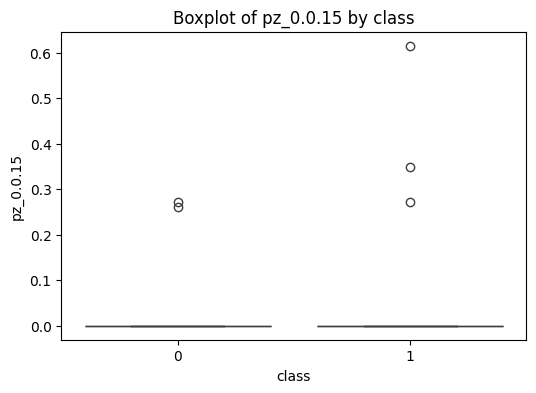

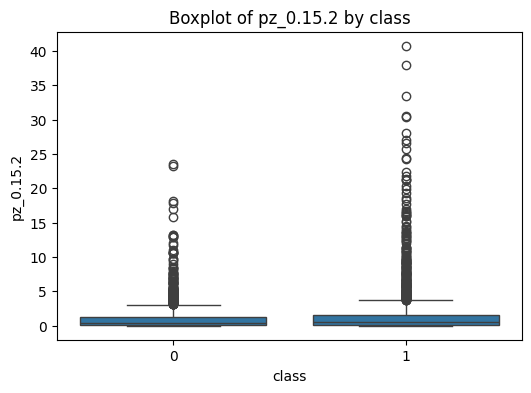

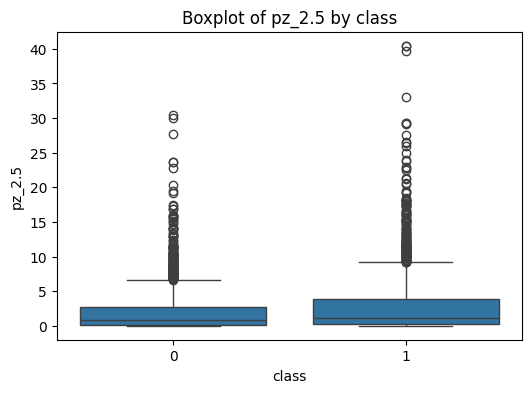

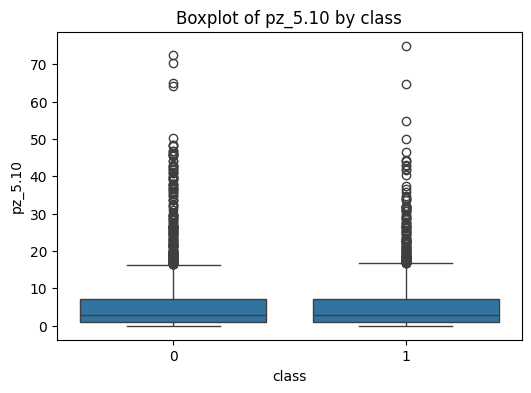

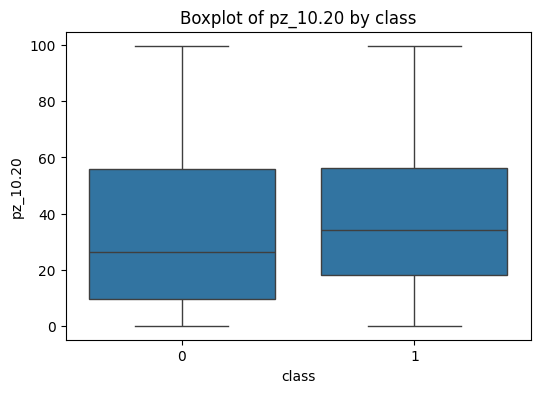

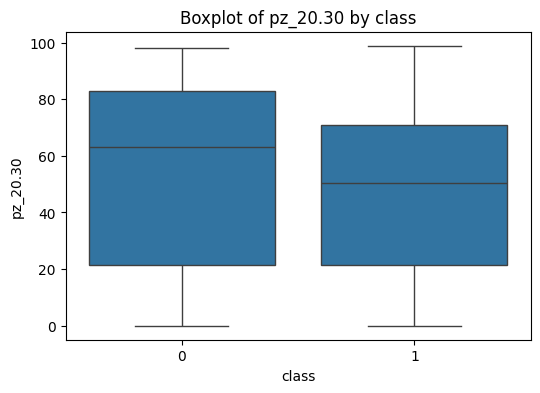

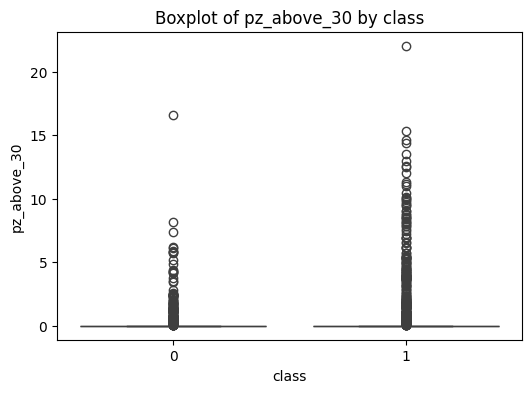

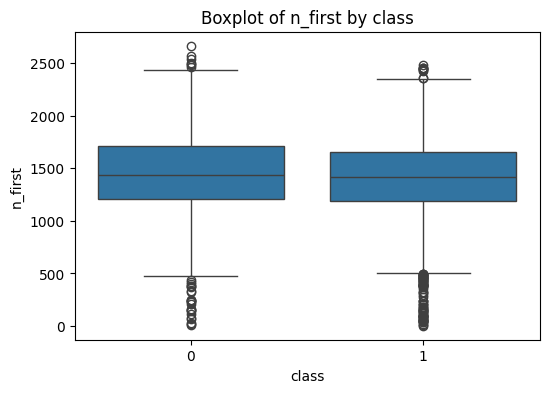

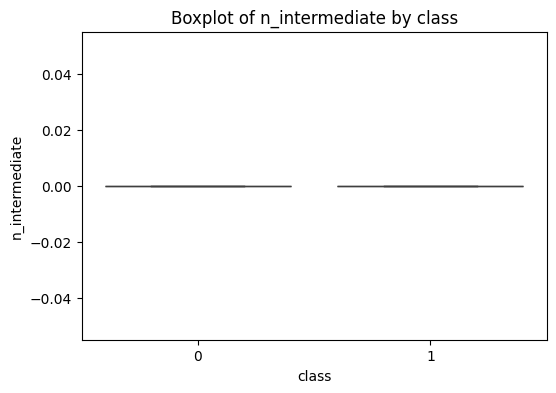

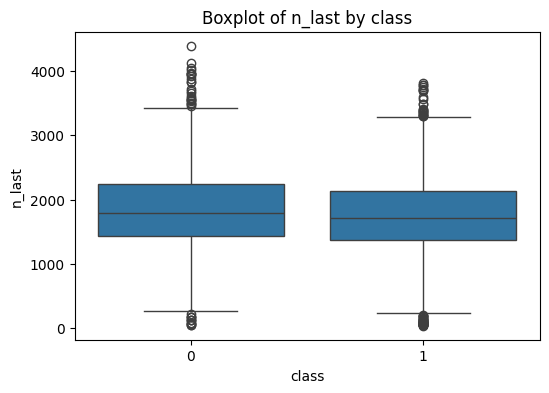

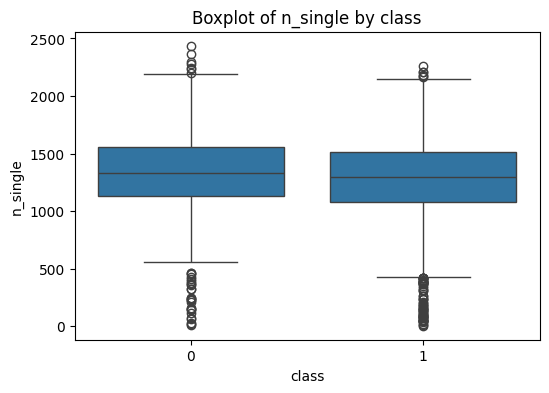

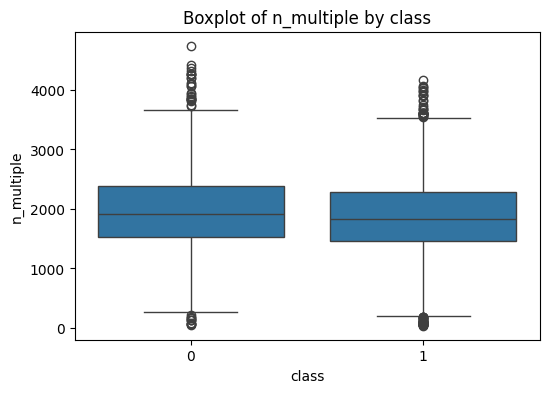

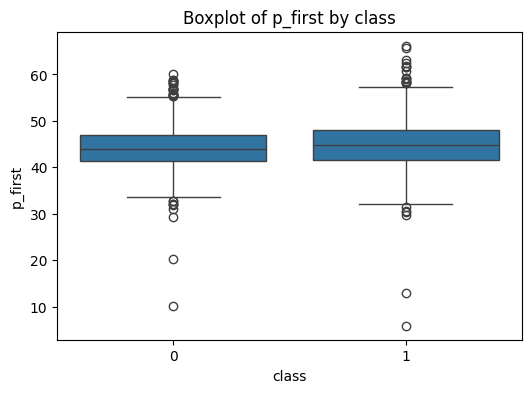

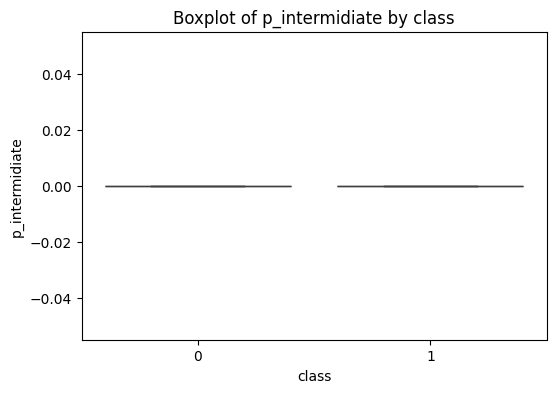

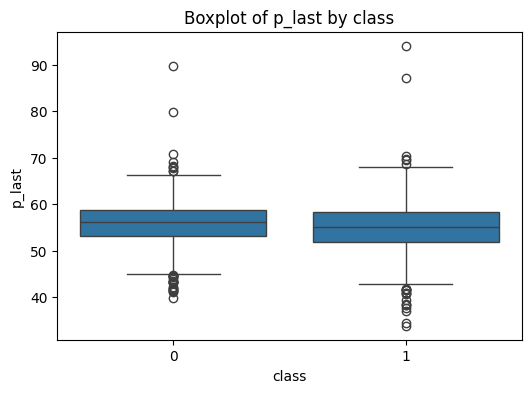

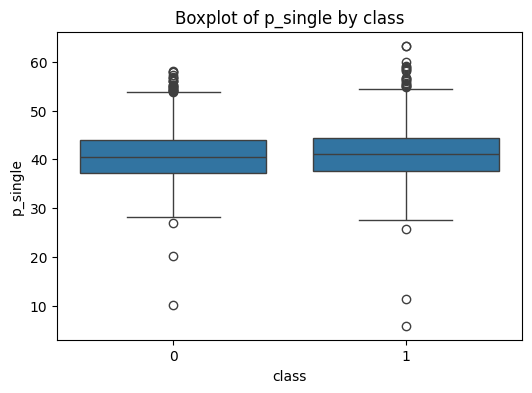

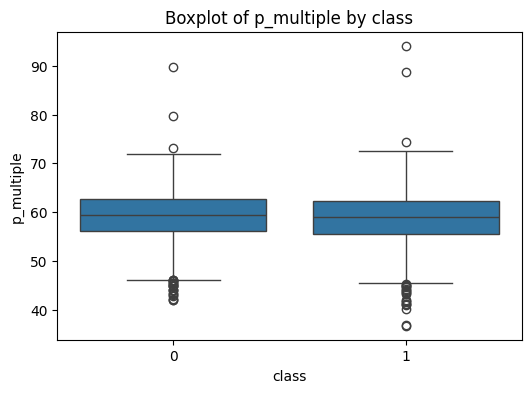

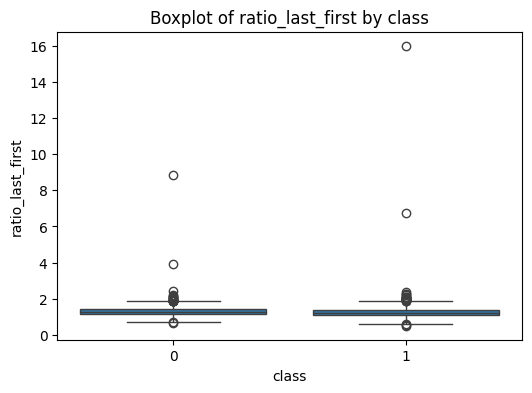

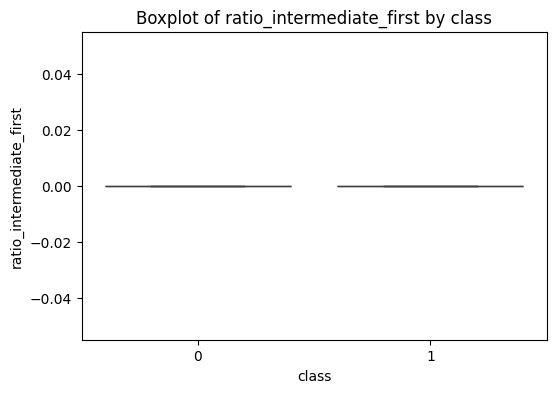

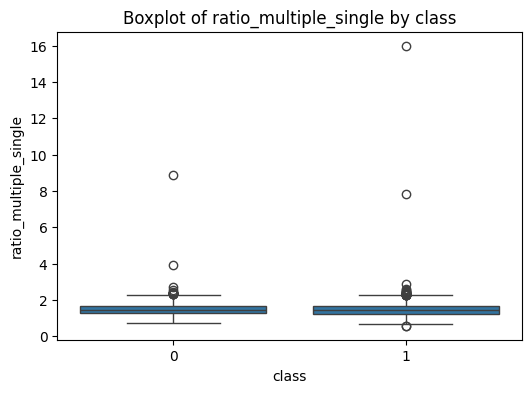

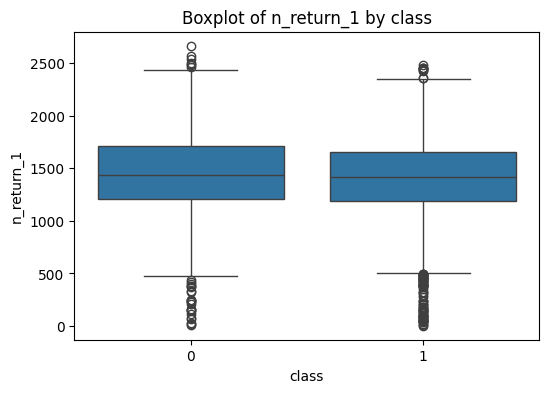

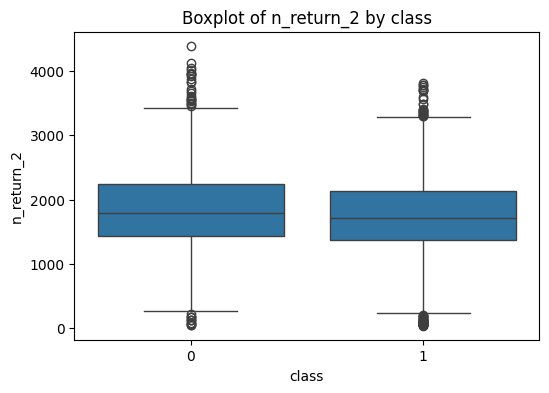

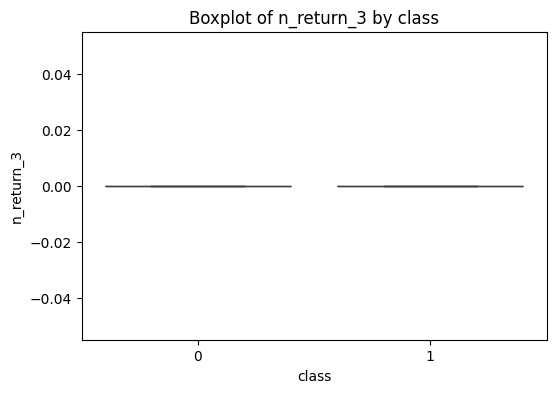

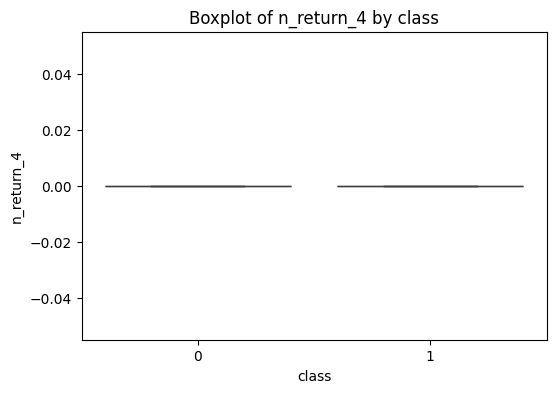

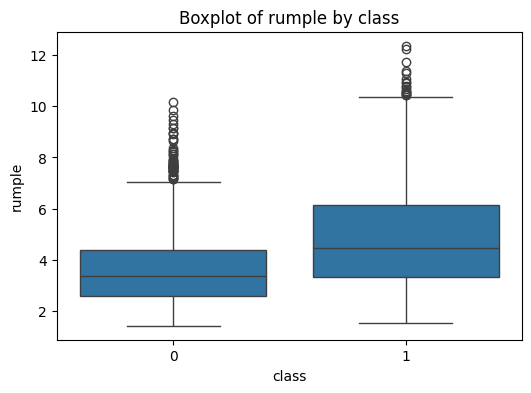

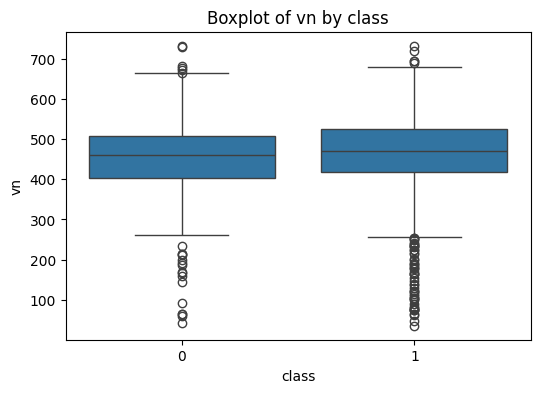

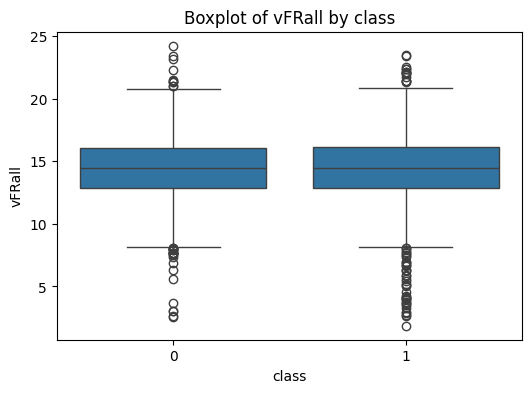

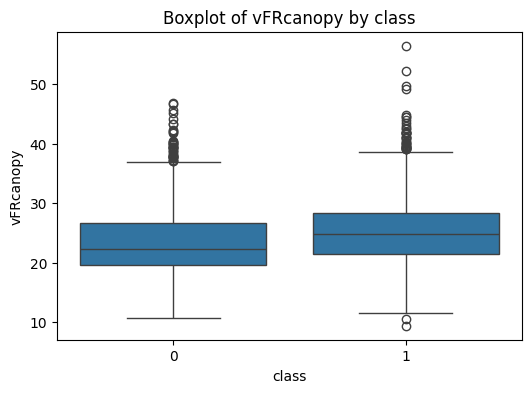

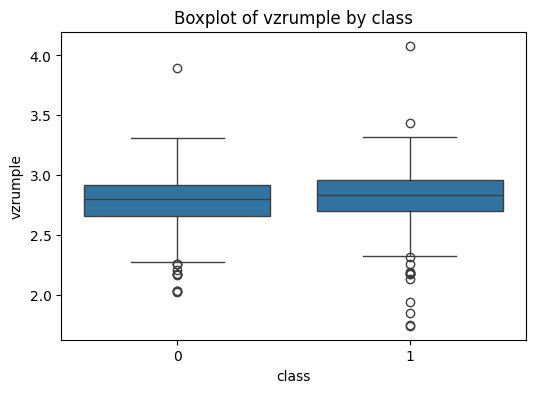

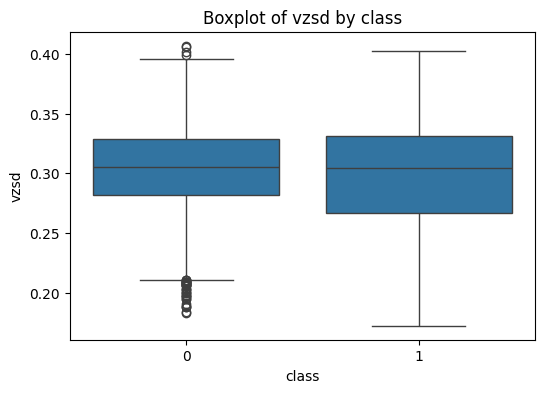

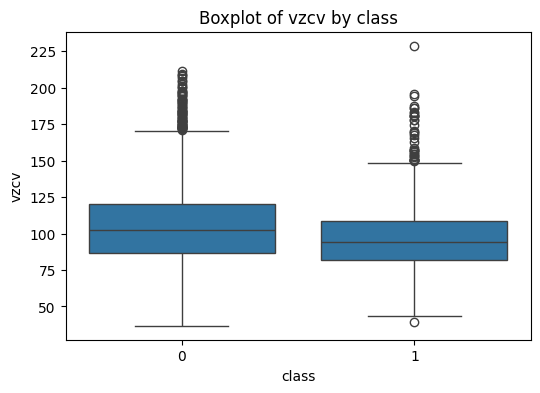

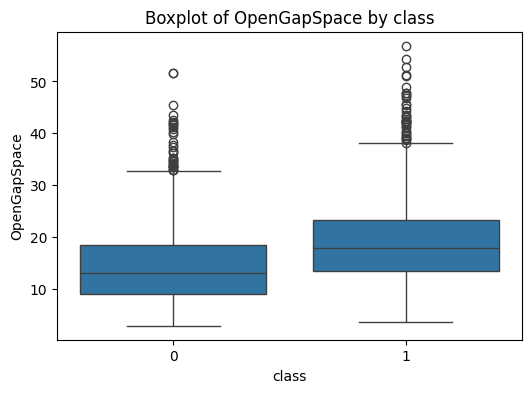

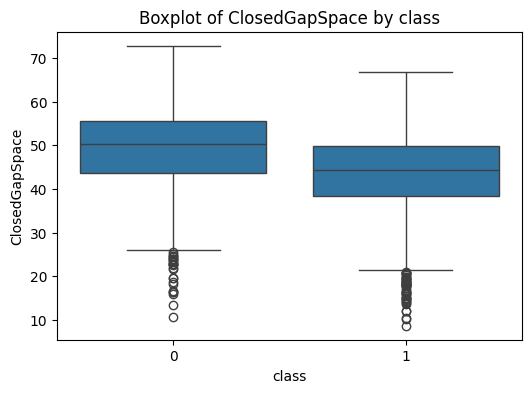

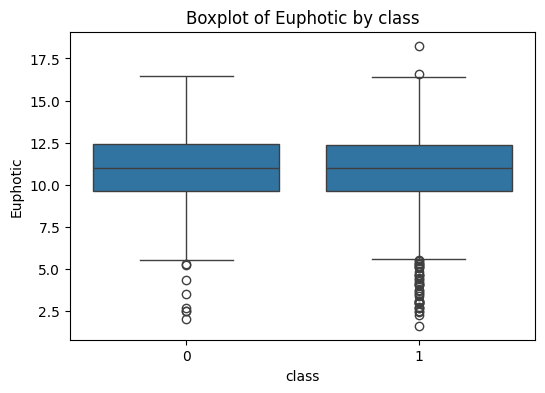

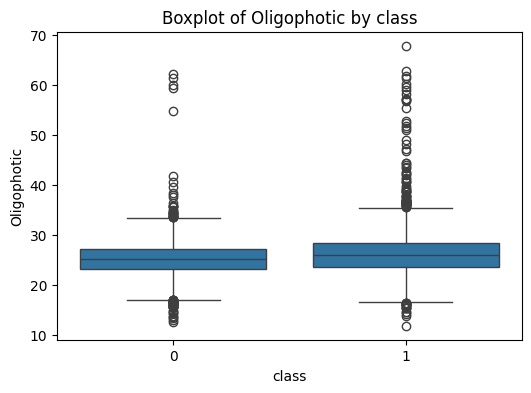

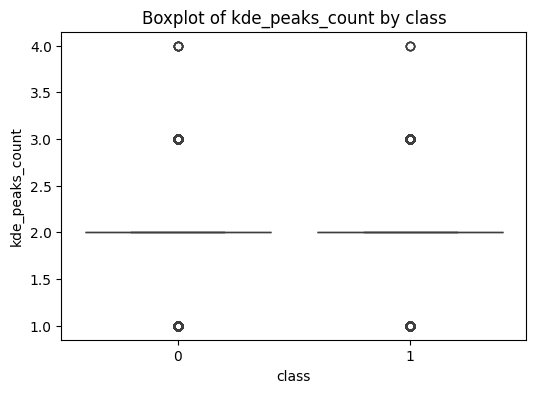

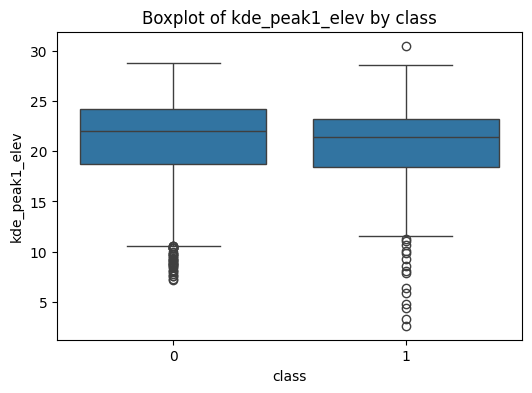

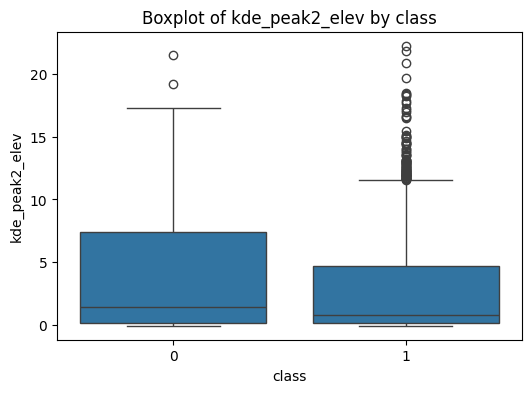

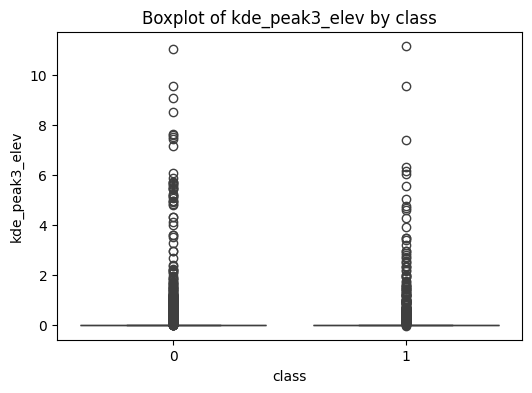

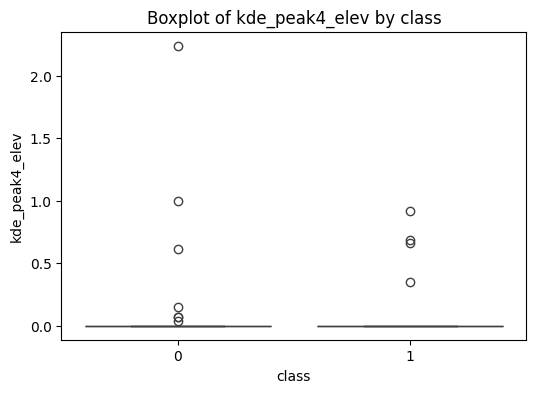

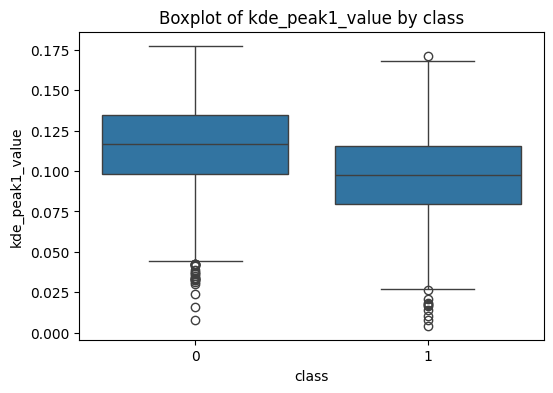

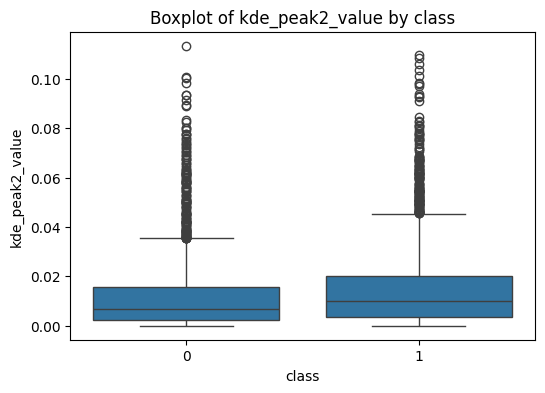

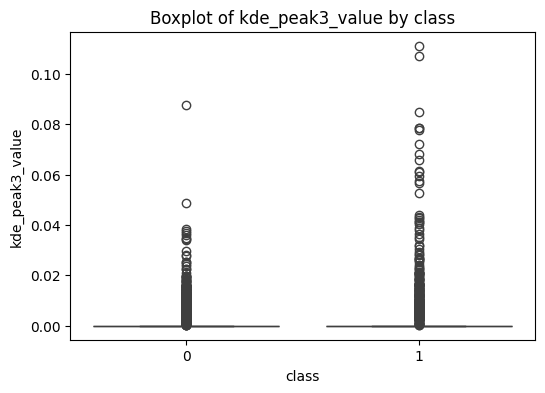

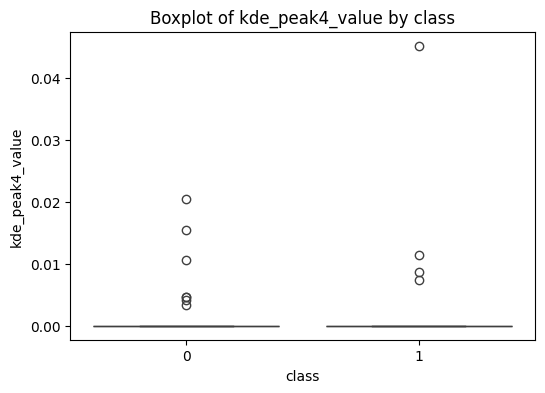

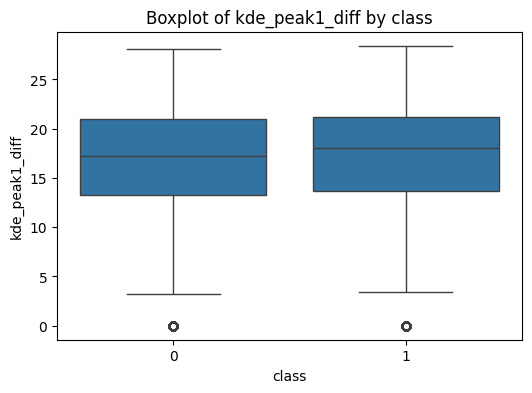

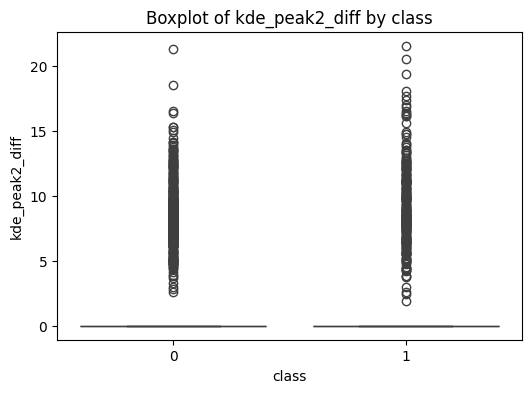

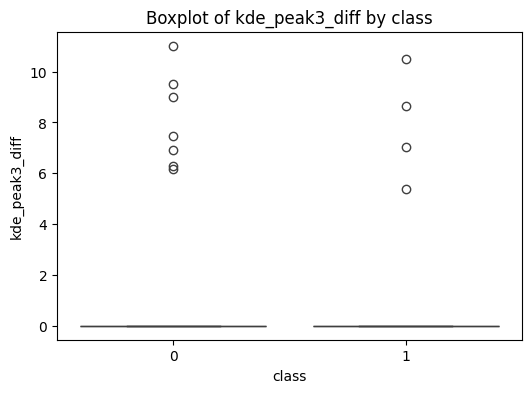

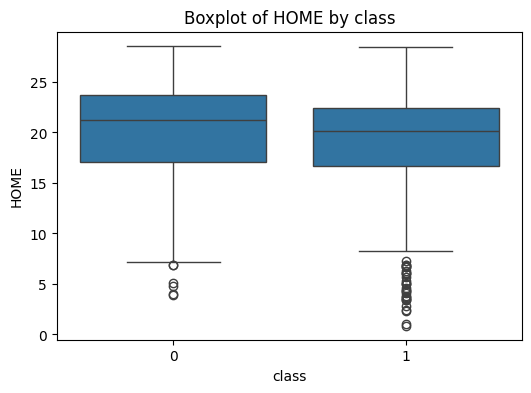

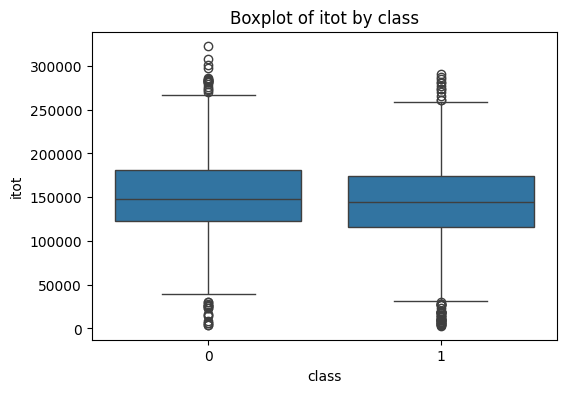

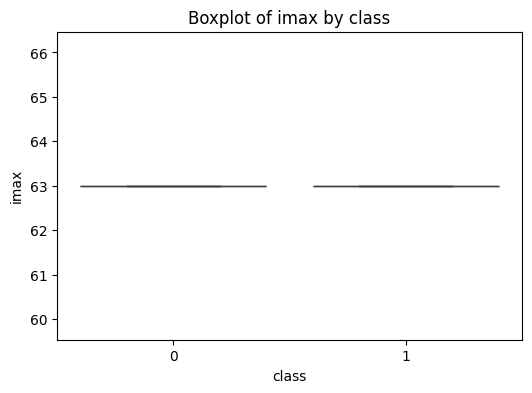

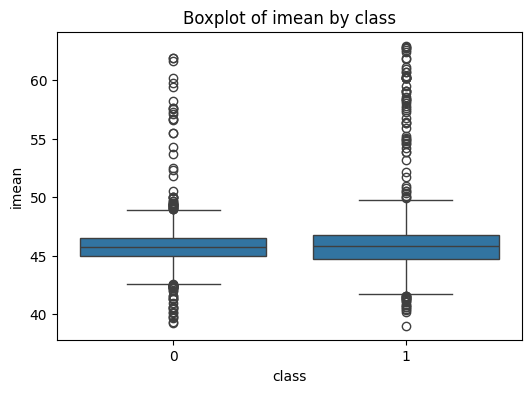

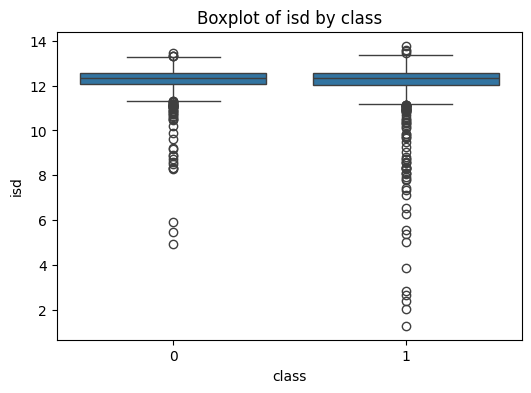

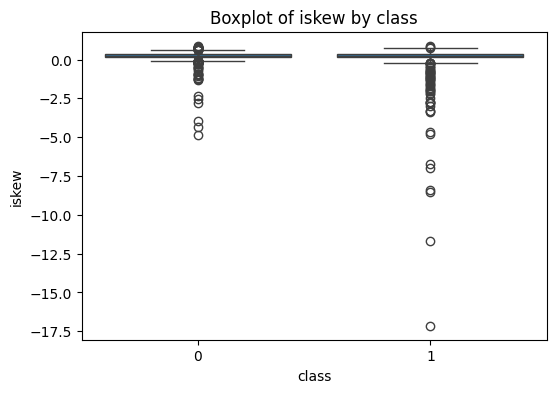

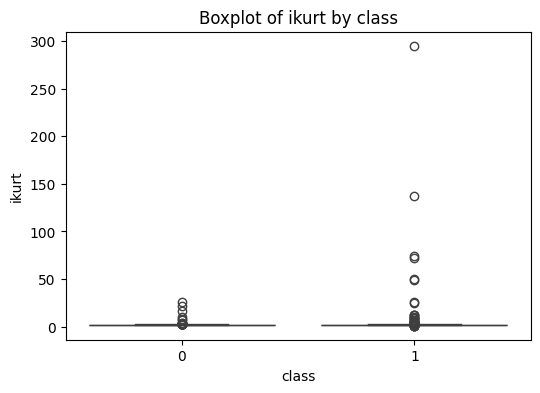

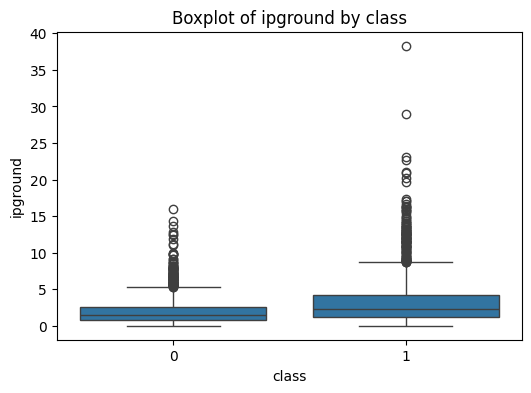

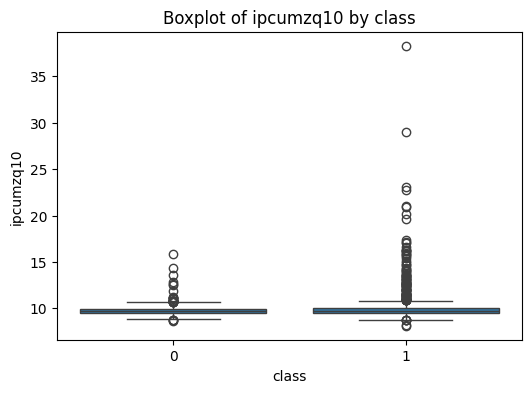

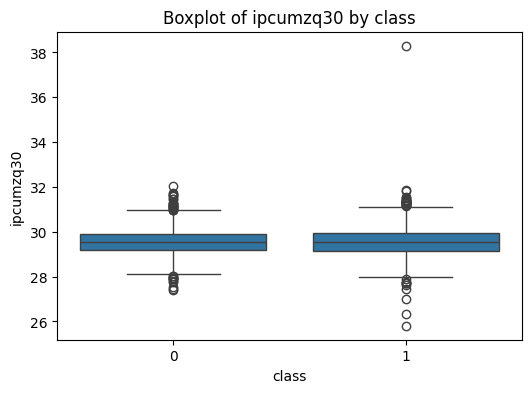

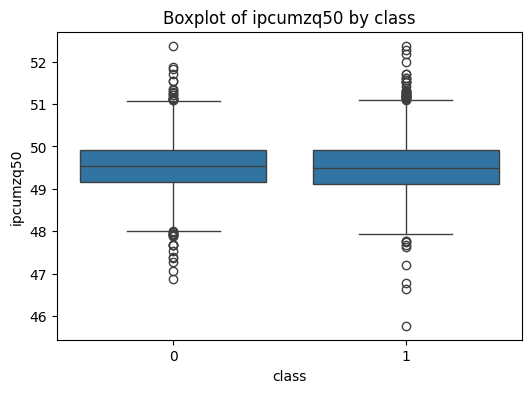

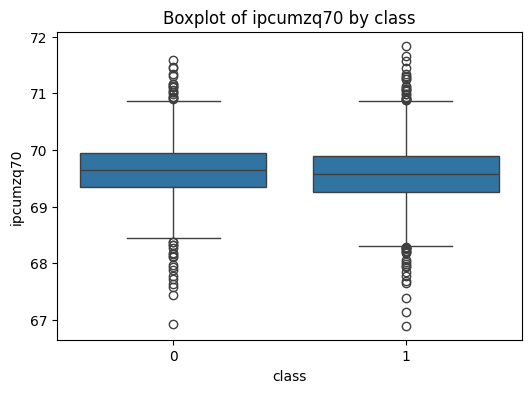

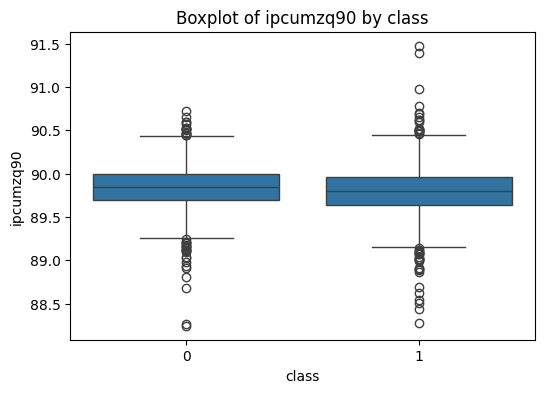

In [97]:
# Create Boxplots for each column by class
print("\nBoxplots for Numerical Columns by Categorical Columns:")
categorical_columns=['class']
for num_col in df.select_dtypes(include=['int64', 'float64']).columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.show()

Data Split

In [10]:
#Subset the dataframe to seperate the input (X) and target (y) variable

X=df.iloc[0:len(df),10:131]
y=df[["class"]]

print(X)
print(y)

            zq1        zq5      zq10      zq15      zq20       zq25      zq30  \
0      0.000000   2.823960   7.26436  11.80252  18.31144  20.577800  20.93822   
1      0.000000   1.727580   4.73300   6.56530  10.08408  20.731750  21.60904   
2      0.000000   1.516120   5.10098   7.73317  16.72440  19.941625  20.77172   
3      0.000000   1.225400   4.59880   7.44498  17.17108  20.094500  20.92688   
4      0.000000   1.290280   4.50234  16.64972  20.81412  21.930300  22.93548   
...         ...        ...       ...       ...       ...        ...       ...   
3597  10.878400  11.687240  12.52378  13.07154  13.57332  13.998100  14.32782   
3598   8.453336   9.845645  10.68695  11.27577  11.77540  12.130400  12.43501   
3599   9.724316  10.982590  11.62252  11.91438  12.40366  12.983400  13.44732   
3600   6.396500   7.901875   9.09015   9.56610  10.24160  10.568175  10.95625   
3601   7.283678   9.047280   9.93330  10.48424  10.93208  11.379100  11.91924   

           zq35      zq40  

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
y_train

class
677       0
1111      0
1115      0
950       1
2544      0
...     ...
1193      1
1874      0
159       0
195       0
1814      1

[2881 rows x 1 columns]

Feature Selection

In [183]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import linear_model

sfs = SequentialFeatureSelector(linear_model.LogisticRegression(max_iter=500),
                                k_features=10,
                                forward=True,
                                floating=False,
                                scoring='accuracy',
                                cv=5)

selected_features = sfs.fit(X_train, y_train)

C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [199]:
sfs_res=pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_res.feature_names[10]

('pzabove2',
 'CRR',
 'zpcum8',
 'L1',
 'pz_5.10',
 'n_first',
 'Oligophotic',
 'kde_peak1_value',
 'imax',
 'ipcumzq30')

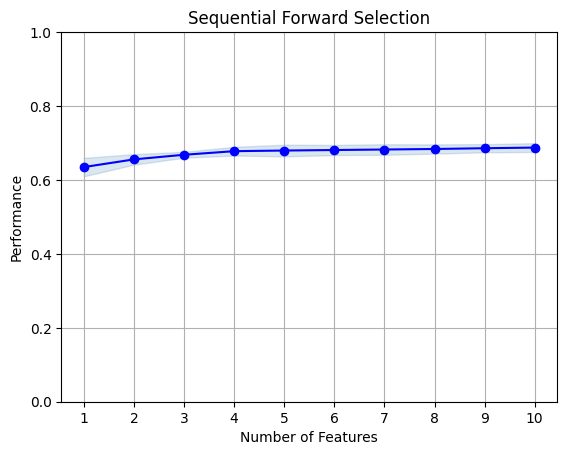

In [195]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict())

plt.ylim([0, 1])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [164]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import linear_model

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = y_train.to_numpy()

sbs = SequentialFeatureSelector(linear_model.LogisticRegression(max_iter=500),
                                k_features=8,
                                forward=False,
                                floating=False,
                                scoring='accuracy',
                                cv=None)

selected_features_back = sbs.fit(X_scaled, y_scaled)

C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [12]:
#Subset X data to selected features

X_train_feat=X_train[['pzabove2', 'CRR', 'zpcum8', 'L1', 'pz_5.10', 'n_first', 'Oligophotic', 'kde_peak1_value', 'imax', 'ipcumzq30']]
X_test_feat=X_test[['pzabove2', 'CRR', 'zpcum8', 'L1', 'pz_5.10', 'n_first', 'Oligophotic', 'kde_peak1_value', 'imax', 'ipcumzq30']]

In [106]:
#Check data variance
print(df.var())

class        2.500666e-01
n            1.007901e+06
zmax         1.021584e+01
zmin         4.735194e-02
zmean        1.594564e+01
                 ...     
ipcumzq10    1.016835e+00
ipcumzq30    3.780612e-01
ipcumzq50    3.844053e-01
ipcumzq70    2.628326e-01
ipcumzq90    6.776023e-02
Length: 121, dtype: float64


Model Building (Random Forest)

In [25]:
# Train the random forest model with default parameter
rf_model_py = RandomForestClassifier()
rf_model_py.fit(X_train_feat, y_train)

C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [26]:
# Predict on the test set
y_pred = rf_model_py.predict(X_test_feat)

# Print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.6754507628294036


In [27]:
# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision (Python): {precision:.4f}")
print(f"Recall (Python): {recall:.4f}")
print(f"F1-Score (Python): {f1:.4f}")

Precision (Python): 0.6755
Recall (Python): 0.6755
F1-Score (Python): 0.6755


Hyperparameter Search

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,250,500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search =grid_search.fit(X_train_feat, y_train)

print("Best parameters:", grid_search.best_params_)

C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [234]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [255]:
gs_res=pd.DataFrame.from_dict(grid_search.cv_results_)
gs_res.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.951421      0.023841         0.018975        0.004101   
1       2.302495      0.014343         0.044421        0.004433   
2       4.588742      0.033284         0.091974        0.002634   
3       0.909411      0.006265         0.021875        0.007654   
4       2.248756      0.011111         0.050450        0.006025   

  param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0            None                       1                        2   
1            None                       1                        2   
2            None                       1                        2   
3            None                       1                        5   
4            None                       1                        5   

   param_n_estimators                                             params  \
0                 100  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
1                 250  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
2                 500  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
3                 100  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
4                 250  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.693241           0.661458           0.699653           0.652778   
1           0.724437           0.663194           0.701389           0.659722   
2           0.714038           0.678819           0.697917           0.668403   
3           0.696707           0.675347           0.694444           0.671875   
4           0.701906           0.666667           0.706597           0.677083   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.666667         0.674759        0.018368               81  
1           0.663194         0.682387        0.025999               69  
2           0.661458         0.684127        0.019360               58  
3           0.649306         0.677536        0.017247               80  
4           0.668403         0.684131        0.016869               55

C:\Users\ACER\AppData\Local\Temp\ipykernel_13384\1954040185.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


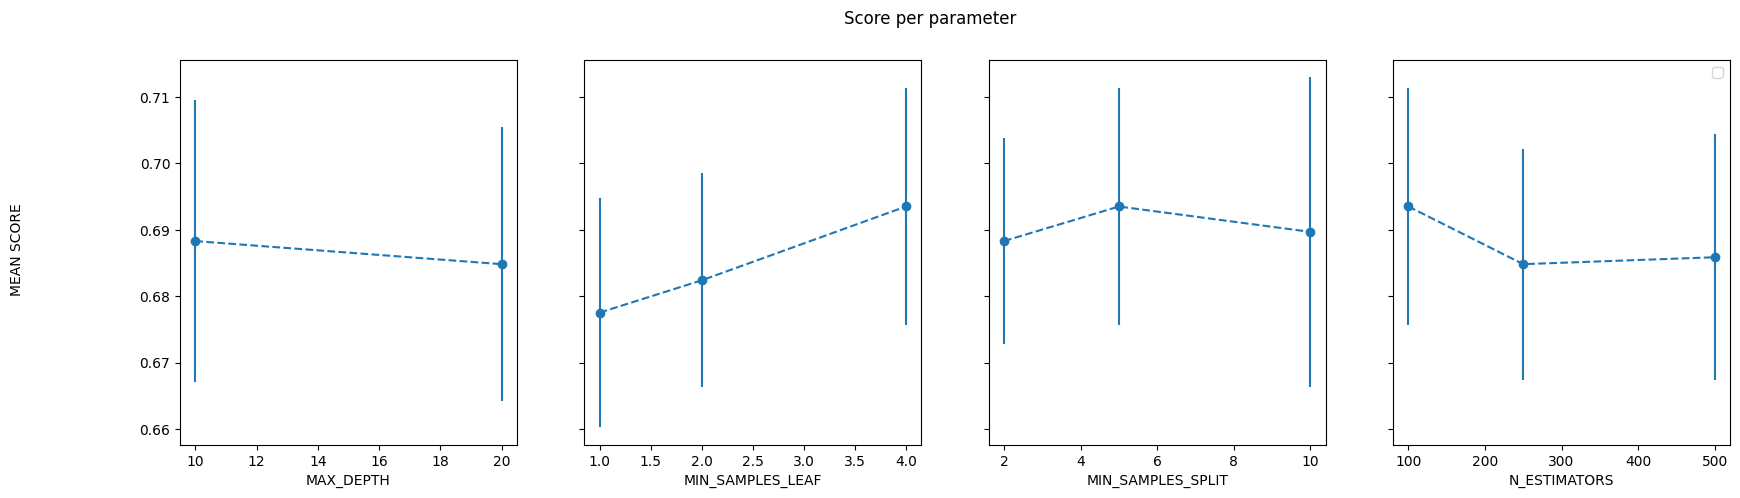

In [278]:
import numpy as np

def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid_search.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(grid_search)

In [44]:
# Train and test with new parameter
rf_model_py_refine = RandomForestClassifier(n_estimators=100,min_samples_leaf=4,min_samples_split=5)
rf_model_py_refine.fit(X_train_feat, y_train)

# Predict on the test set
y_pred_refine = rf_model_py_refine.predict(X_test_feat)

# Print the model accuracy
accuracy_refine = accuracy_score(y_test, y_pred_refine)
print(f"Model accuracy: {accuracy_refine}")

precision_refine = precision_score(y_test, y_pred_refine, average='weighted')
recall_refine = recall_score(y_test, y_pred_refine, average='weighted')
f1_refine = f1_score(y_test, y_pred_refine, average='weighted')

# Print the results
print(f"Precision (Python): {precision_refine:.4f}")
print(f"Recall (Python): {recall_refine:.4f}")
print(f"F1-Score (Python): {f1_refine:.4f}")

C:\Users\ACER\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model accuracy: 0.7018030513176144
Precision (Python): 0.7018
Recall (Python): 0.7018
F1-Score (Python): 0.7018


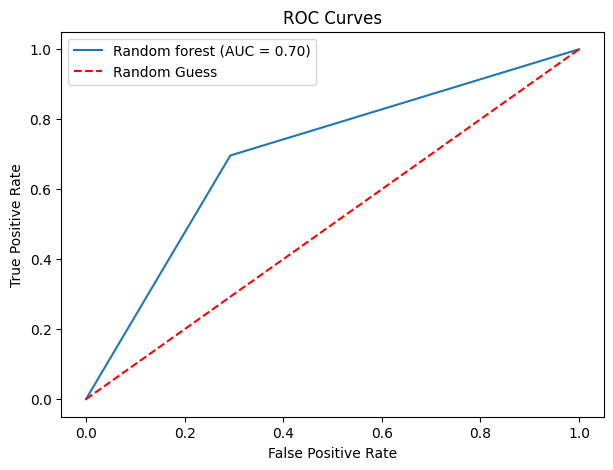

In [45]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7, 5))

fpr, tpr, _ = roc_curve(y_test, y_pred_refine)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random forest (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

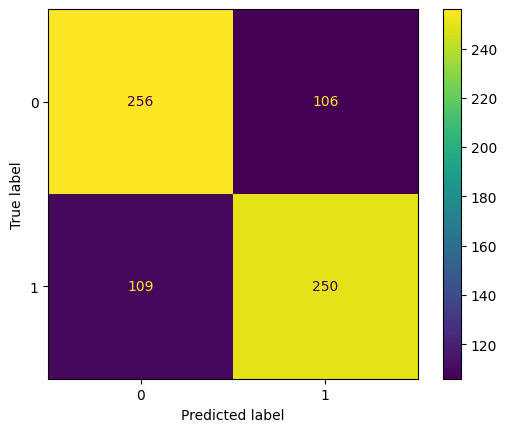

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
